<h1 align='center'>Walmart Sales Forecasting Project<h1>

## Introduction
Walmart is an American multinational retail corporation that operates a chain of discount department stores, hypermarkets, and grocery stores in the United States and 23 other countries. It is one of the world's largest brick-and-mortar retailers and one of the fastest growing e-commerce organizations. Walmart's business strategy is based on the late 19th century five-and-dime retail model, but it also includes operational efficiency, technological approaches, and competitiveness.

## Introduction to dataset
we have been provided with sales data for 111 products whose sales may be affected by the weather. These 111 products are sold in stores at 45 different Walmart locations. Some of the products may be a similar item (such as milk) but have a different id in different stores/regions/suppliers. The 45 locations are covered by 20 weather stations.

## Objective of the Project
A retail store(Walmart) that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. So, we have to use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

## Feature Description
1. **Categorical Attributes**
- **Holiday_Flag:** If it is a holiday week.
- **Store:** Store number.
- **Date:** Week of Sales.

2. **Continuous Attributes**

- **Weekly_Sales:** Sales for the given store in that week.
- **Temperature:** Temperature on the day of the sale.
- **Fuel_Price:** Cost of the fuel in the region.
- **CPI:** Consumer Price Index.
- **Unemployment:** Unemployment Rate.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Set the display option to avoid scientific notation

pd.options.display.float_format = '{:.0f}'.format

In [3]:
df_walmart = pd.read_csv('Walmart Dataset.csv')

In [4]:
df_walmart.head(3)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010       1643691             0           42           3   
1      1  12-02-2010       1641957             1           39           3   
2      1  19-02-2010       1611968             0           40           3   

   CPI  Unemployment  
0  211             8  
1  211             8  
2  211             8

## 1. You are provided with the weekly sales data for their various outlets. 
**Use `statistical analysis`, `EDA`, `outlier analysis`, and `handle the missing values` to come up with various insights that can give them a clear perspective on the following:**

In [5]:
df = df_walmart[df_walmart['Holiday_Flag'] == 0]
print("Week not having holiday Average Sales:", df['Weekly_Sales'].mean(), "\nShape:", df.shape, "\n")

df = df_walmart[df_walmart['Holiday_Flag'] == 1]
print("Week having holiday Average Sales:", df['Weekly_Sales'].mean(), "\nShape:", df.shape)

Week not having holiday Average Sales: 1041256.3802088555 
Shape: (5985, 8) 

Week having holiday Average Sales: 1122887.8923555557 
Shape: (450, 8)


### 1.2 EDA

In [6]:
df_walmart['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [7]:
df_walmart['Holiday_Flag'].unique() 

array([0, 1], dtype=int64)

In [8]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


- Date column has Datatype `object` but it should have `datetime` datatype let's convert it.

In [9]:
df_walmart['Date'] = pd.to_datetime(df_walmart.Date, format='%d-%m-%Y')

In [10]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [11]:
df_walmart.describe().T

count                 mean                  min  \
Store         6435                   23                    1   
Date          6435  2011-06-17 00:00:00  2010-02-05 00:00:00   
Weekly_Sales  6435              1046965               209986   
Holiday_Flag  6435                    0                    0   
Temperature   6435                   61                   -2   
Fuel_Price    6435                    3                    2   
CPI           6435                  172                  126   
Unemployment  6435                    8                    4   

                              25%                  50%                  75%  \
Store                          12                   23                   34   
Date          2010-10-08 00:00:00  2011-06-17 00:00:00  2012-02-24 00:00:00   
Weekly_Sales               553350               960746              1420159   
Holiday_Flag                    0                    0                    0   
Temperature                    47                   63                   75   
Fuel_Price                      3                    3                    4   
CPI                           132                  183                  213   
Unemployment                    7                    8                    9   

                              max    std  
Store                          45     13  
Date          2012-10-26 00:00:00    NaN  
Weekly_Sales              3818686 564367  
Holiday_Flag                    1      0  
Temperature                   100     18  
Fuel_Price                      4      0  
CPI                           227     39  
Unemployment                   14      2

### Outlier Analysis

In [12]:
std = df_walmart['Weekly_Sales'].std()
std

564366.6220536975

In [13]:
mean = df_walmart['Weekly_Sales'].mean()
mean

1046964.8775617715

In [14]:
std_dev_3 = mean + 3*std
std_dev_3

2740064.743722864

In [15]:
df_walmart[df_walmart['Weekly_Sales'] > std_dev_3].head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
189      2 2010-12-24       3436008             0           50           3   
241      2 2011-12-23       3224370             0           47           3   
471      4 2010-11-26       2789469             1           48           3   
475      4 2010-12-24       3526713             0           43           3   
523      4 2011-11-25       3004702             1           48           3   

     CPI  Unemployment  
189  211             8  
241  219             7  
471  127             7  
475  127             7  
523  130             5

In [16]:
df_walmart.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [17]:
q1 = df_walmart.quantile(0.25)
q2 = df_walmart.quantile(0.5)
q3 = df_walmart.quantile(0.75)

In [18]:
IQR = q3 - q1
IQR

Store                          22
Date            504 days 00:00:00
Weekly_Sales               866809
Holiday_Flag                    0
Temperature                    27
Fuel_Price                      1
CPI                            81
Unemployment                    2
dtype: object

In [19]:
ul = q3 + 1.5*IQR
ll = q1 - 1.5*IQR

In [20]:
ll

Store                           -21
Date            2008-09-12 00:00:00
Weekly_Sales                -746863
Holiday_Flag                      0
Temperature                       6
Fuel_Price                        2
CPI                              10
Unemployment                      4
dtype: object

In [21]:
ul

Store                            67
Date            2014-03-21 00:00:00
Weekly_Sales                2720371
Holiday_Flag                      0
Temperature                     116
Fuel_Price                        5
CPI                             334
Unemployment                     11
dtype: object

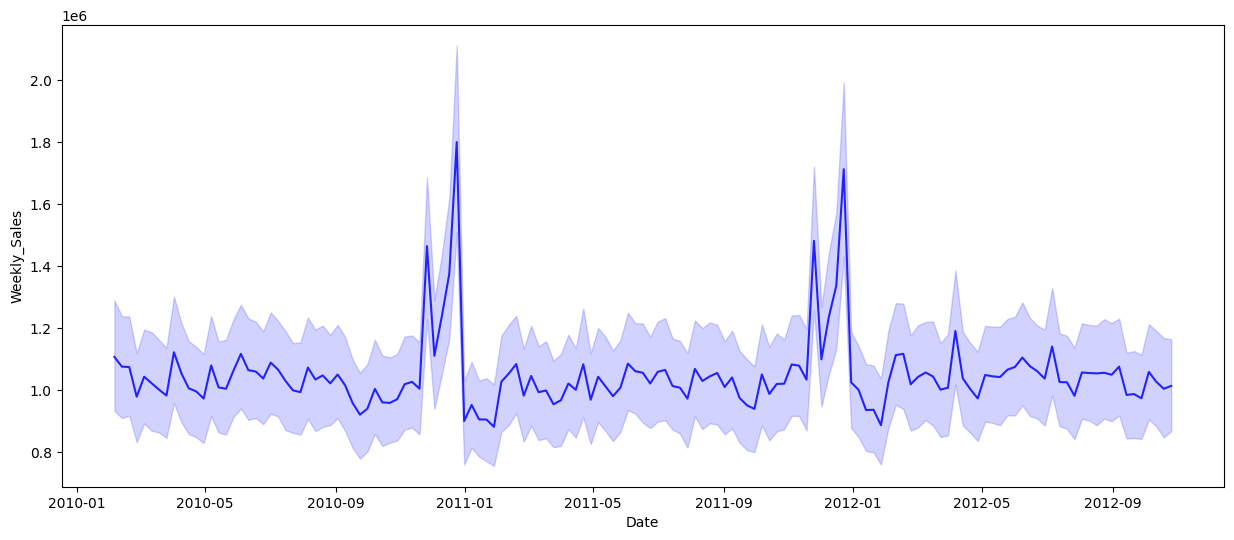

In [22]:
fig = plt.subplots(figsize=(15, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=df_walmart, color='#2222FF')
plt.show()

In [23]:
df_walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [24]:
z_scores = df_walmart.apply(lambda x: np.abs((x-x.mean()) / x.std()))
threshold = 3
outliers = df_walmart[z_scores > threshold]

outliers.describe().T

count    mean     min     25%     50%     75%     max    std
Store            0     NaN     NaN     NaN     NaN     NaN     NaN    NaN
Date             0     NaT     NaT     NaT     NaT     NaT     NaT    NaN
Weekly_Sales    30 3133589 2752122 2795011 2945073 3517032 3818686 380150
Holiday_Flag   450       1       1       1       1       1       1      0
Temperature      1      -2      -2      -2      -2      -2      -2    NaN
Fuel_Price       0     NaN     NaN     NaN     NaN     NaN     NaN    NaN
CPI              0     NaN     NaN     NaN     NaN     NaN     NaN    NaN
Unemployment   219      14      14      14      14      14      14      0

In [25]:
print(3//3, 3%3)

1 0


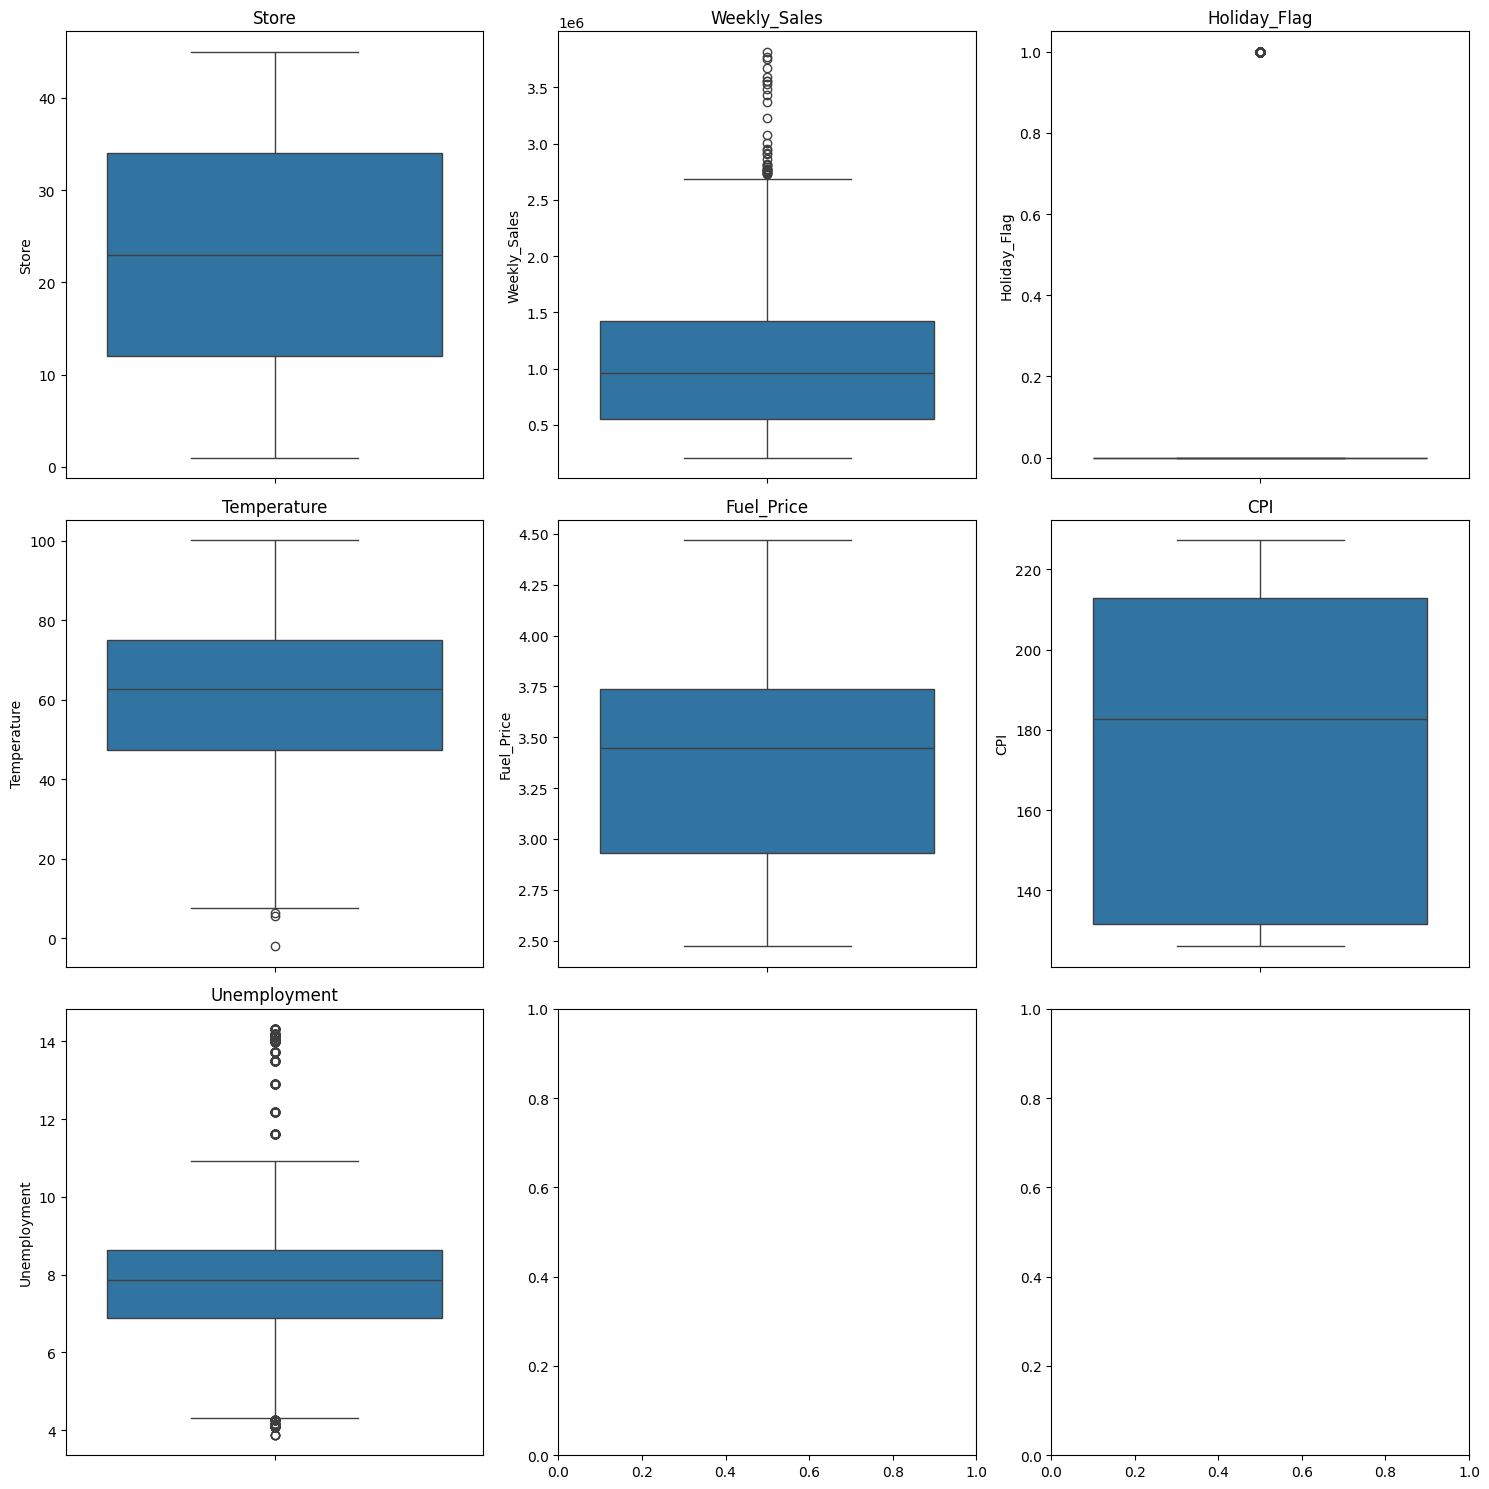

In [26]:
num_cols = 3
num_rows = (len(df_walmart.select_dtypes(include=[np.number]).columns) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize= (15, 5*num_cols))

if num_rows == 1:
    axes = [axes]

for i, col in enumerate(df_walmart.select_dtypes(include= [np.number]).columns):
    row_idx = i // num_cols
    col_idx = i % num_cols

    sns.boxplot(data=df_walmart[col], ax=axes[row_idx][col_idx])

    axes[row_idx][col_idx].set_title(col)

plt.tight_layout()

plt.show()

In [27]:
def handle_outliers(df, col, threshold=3):
    
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())

    outlier_mask = z_scores > threshold

    df_modified = df.copy()
    df_modified.loc[outlier_mask, col] = df[col].median()

    return df_modified

In [28]:
df_new = handle_outliers(df_walmart, 'Weekly_Sales')
df_new = handle_outliers(df_new, 'Unemployment')

In [29]:
df_new.describe().T

count                 mean                  min  \
Store         6435                   23                    1   
Date          6435  2011-06-17 00:00:00  2010-02-05 00:00:00   
Weekly_Sales  6435              1036835               209986   
Holiday_Flag  6435                    0                    0   
Temperature   6435                   61                   -2   
Fuel_Price    6435                    3                    2   
CPI           6435                  172                  126   
Unemployment  6435                    8                    4   

                              25%                  50%                  75%  \
Store                          12                   23                   34   
Date          2010-10-08 00:00:00  2011-06-17 00:00:00  2012-02-24 00:00:00   
Weekly_Sales               553350               960746              1413213   
Holiday_Flag                    0                    0                    0   
Temperature                    47                   63                   75   
Fuel_Price                      3                    3                    4   
CPI                           132                  183                  213   
Unemployment                    7                    8                    9   

                              max    std  
Store                          45     13  
Date          2012-10-26 00:00:00    NaN  
Weekly_Sales              2740057 545425  
Holiday_Flag                    1      0  
Temperature                   100     18  
Fuel_Price                      4      0  
CPI                           227     39  
Unemployment                   14      1

In [30]:
df_walmart = df_new

### Correlation Analysis

In [31]:
df_corr = df_walmart.corr(numeric_only=True)

<Axes: >

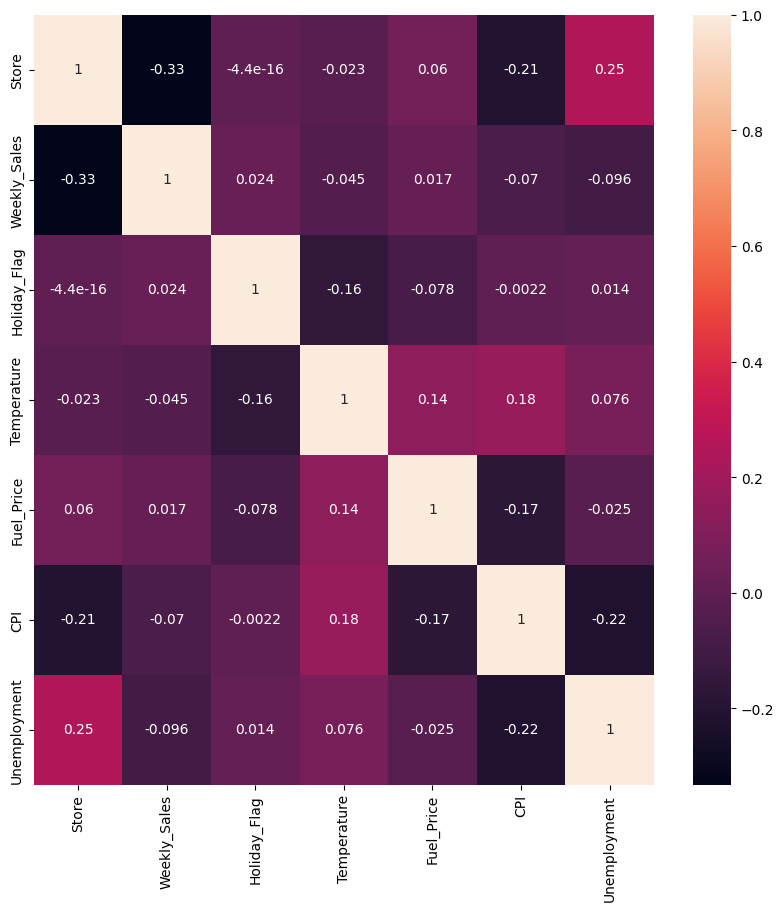

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True)

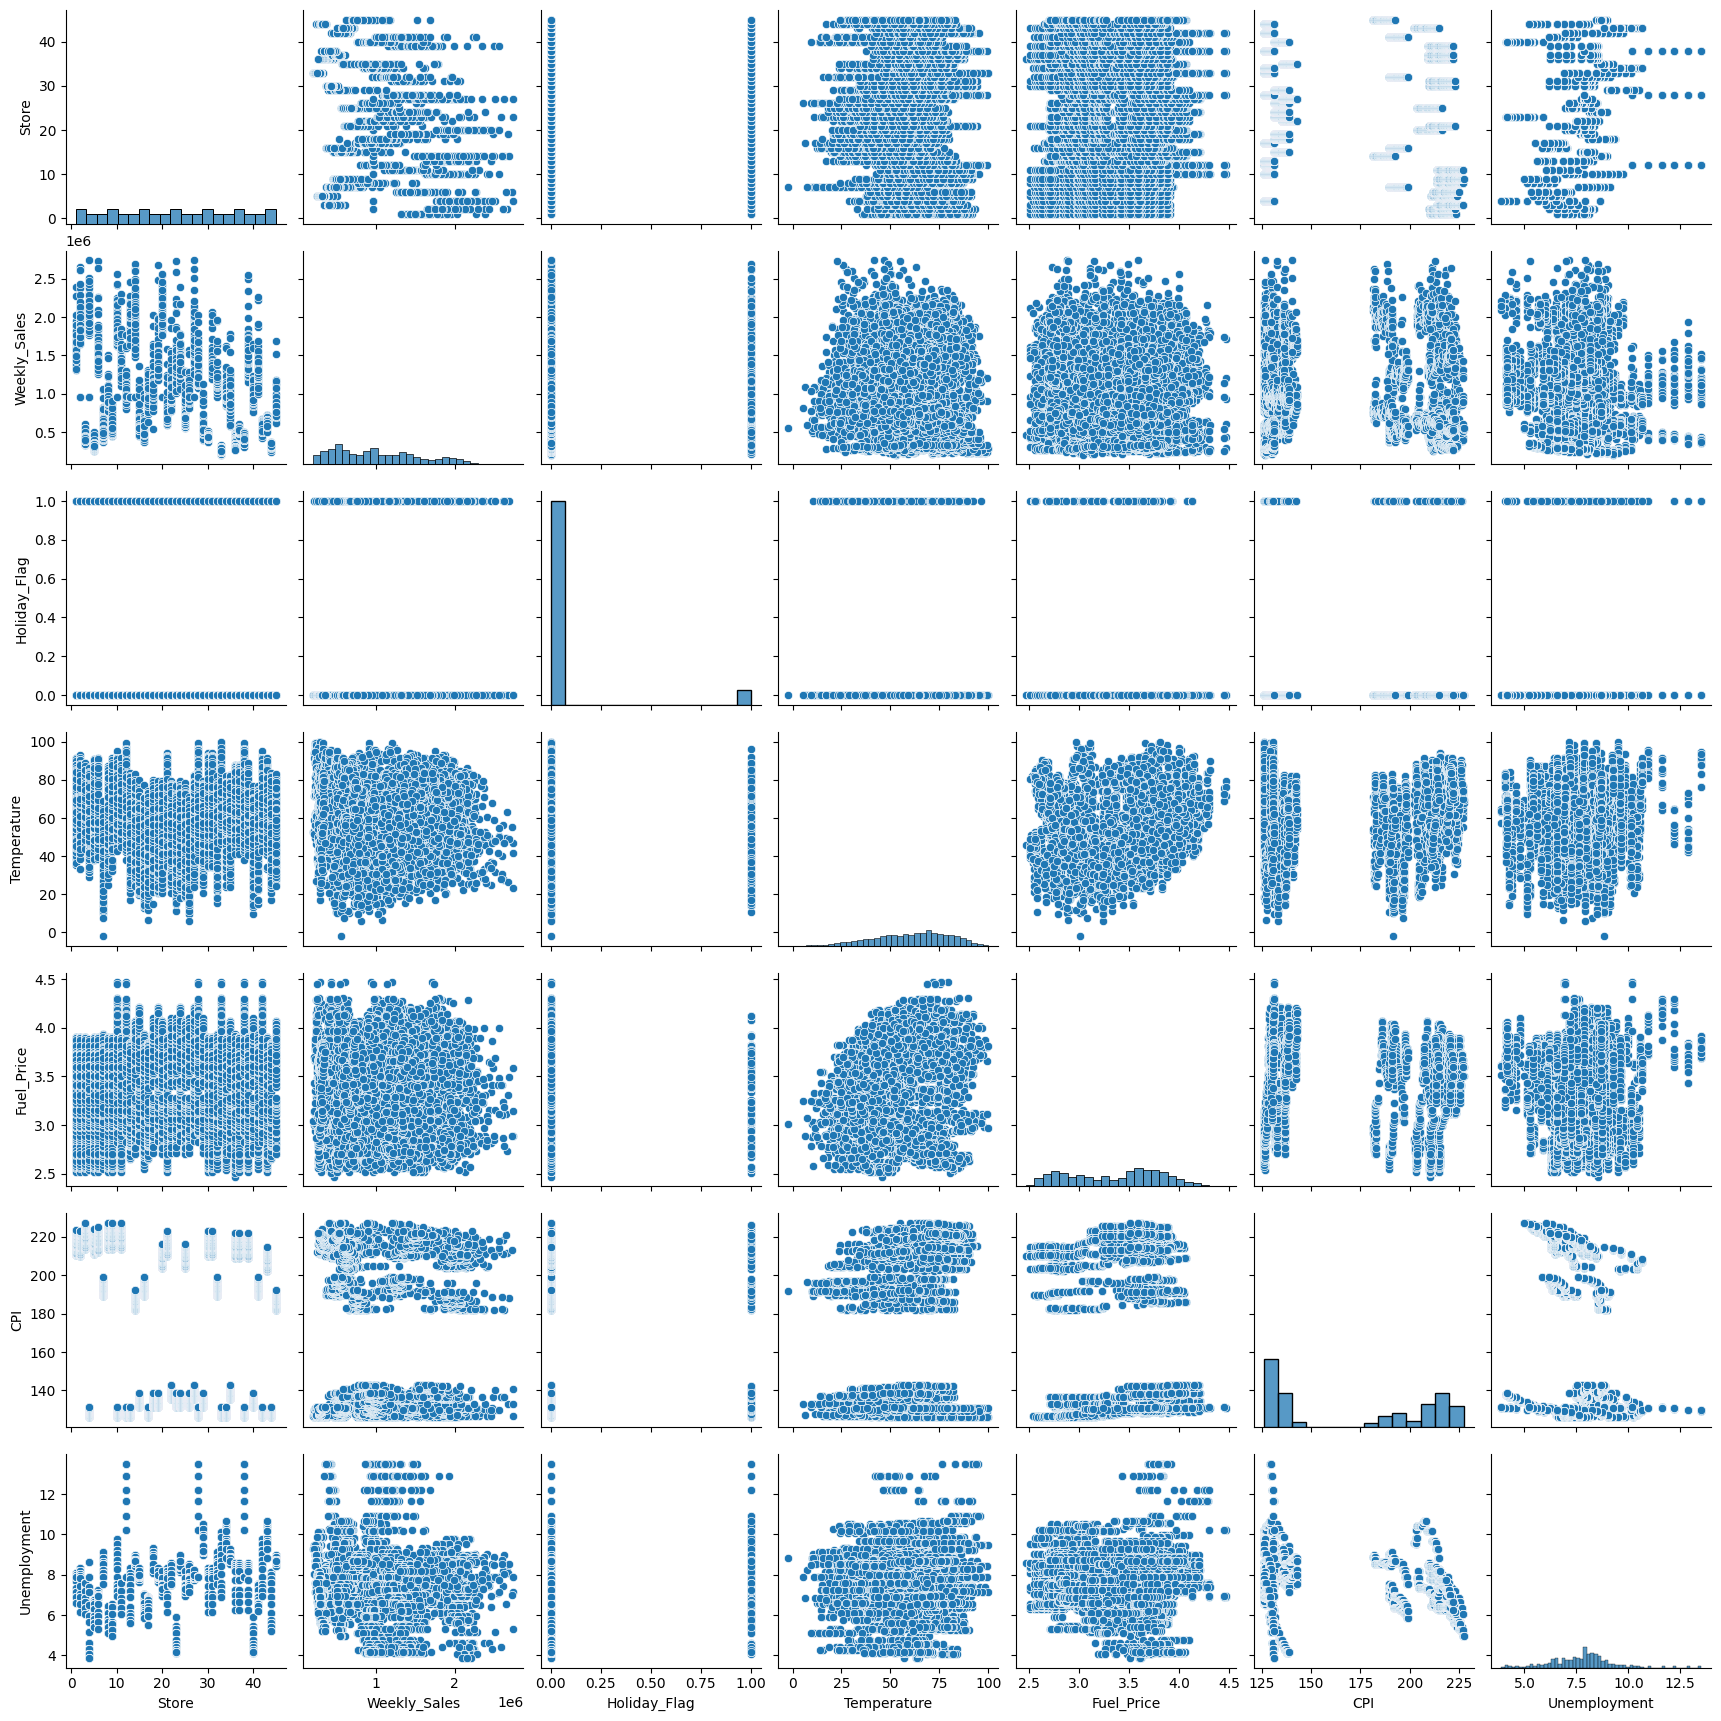

In [33]:
sns.pairplot(df_walmart)

### Conclusion of EDA:
- we have data of 33 weeks from 05/02/2010 to 26/10/2012.
- There are no null or missing values in dataset.
- We have data of 45 local stores.
- Dataset has seasonality present in it near December month Weekly_Sales increases.

### 1.1 Statistical Analysis

### 1.1.1. Univariate Analysis

#### A. Holiday Flag


> **Distribution**

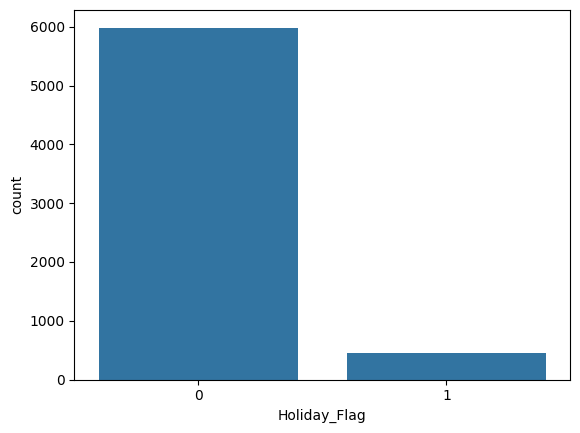

In [34]:
sns.countplot(data=df_walmart, x='Holiday_Flag')
plt.show()

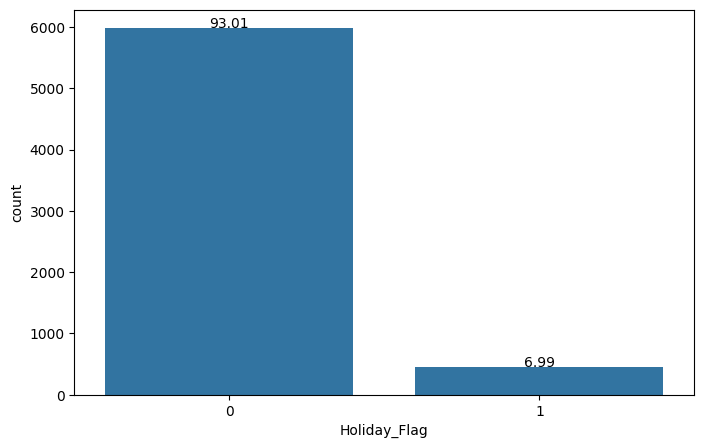

In [35]:
plt.figure(figsize=(8,5))
total = float(len(df_walmart))

ax = sns.countplot(x="Holiday_Flag", data=df_walmart)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.show()

#### B. Temperature

> **Distribution**

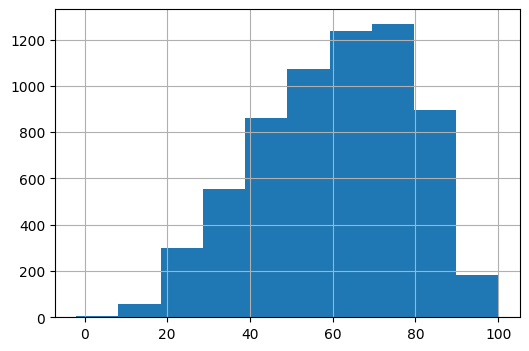

In [36]:
df_walmart['Temperature'].hist(figsize=(6,4))
plt.show()

#### C. Consumer Price Index(CPI)

> **Distribution**

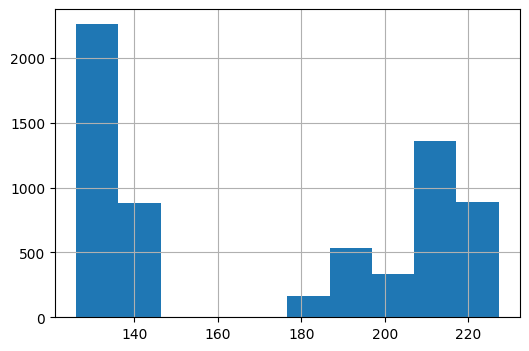

In [37]:
df_walmart['CPI'].hist(figsize=(6,4))
plt.show()

#### D. Unemployment

> **Distribution**

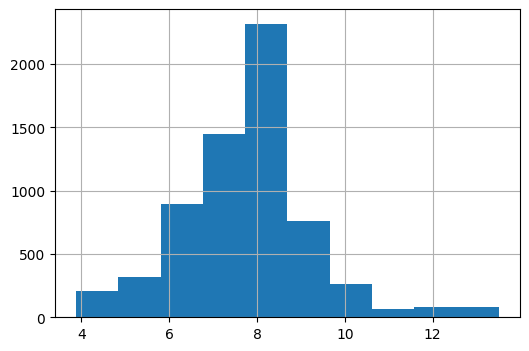

In [38]:
df_walmart['Unemployment'].hist(figsize=(6,4))
plt.show()

#### E. Fuel Price

> **Distribution**

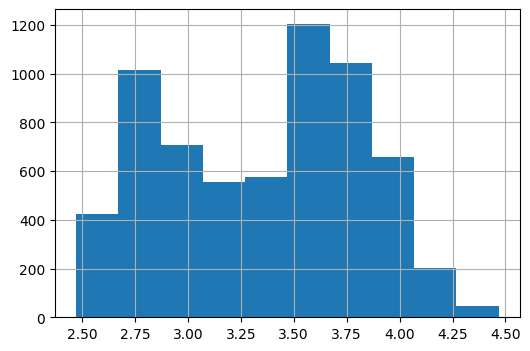

In [39]:
df_walmart['Fuel_Price'].hist(figsize=(6,4))
plt.show()

#### F. Date

> **Distribution**

In [40]:
df_walmart['Date'].value_counts().shape

(143,)

#### G. Store

> **Distribution**

In [41]:
df_walmart['Store'].value_counts().shape

(45,)

#### H. Weekly Sales

> **Distribution**

<Axes: >

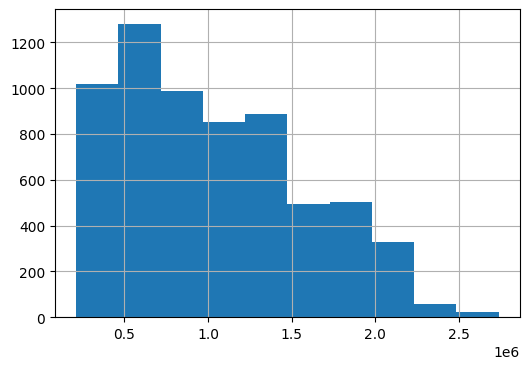

In [42]:
df_walmart['Weekly_Sales'].hist(figsize=(6,4))


### 1.1.2 Bivariate Analysis

#### A. Date and Weekly Sales

> Distribution

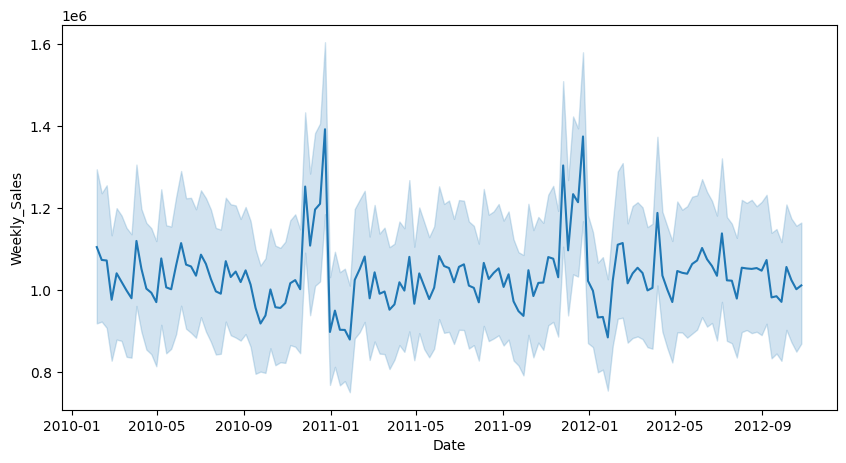

In [43]:
fig = plt.figure(figsize = (10, 5))
sns.lineplot(x='Date', y='Weekly_Sales', data= df_walmart)
plt.show()

## Further Analysis

#### a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [44]:
def calculate_correlation(group):
    return pd.Series({'correlation': group['Weekly_Sales'].corr(group['Unemployment'])})

correlations = df_walmart.groupby('Store').apply(calculate_correlation).reset_index()

C:\Users\Kunal\AppData\Local\Temp\ipykernel_15904\3790312515.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = df_walmart.groupby('Store').apply(calculate_correlation).reset_index()


In [45]:
print("correlation(Weekly_Sales Vs Umemployment):\n\n", correlations.head(3))

correlation(Weekly_Sales Vs Umemployment):

    Store  correlation
0      1           -0
1      2            0
2      3           -0


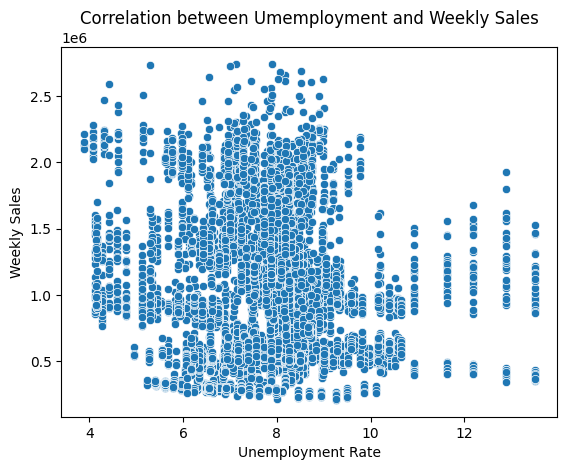

In [46]:
sns.scatterplot(data=df_walmart, x= 'Unemployment', y= 'Weekly_Sales')
plt.title("Correlation between Umemployment and Weekly Sales")
plt.xlabel("Unemployment Rate")
plt.ylabel("Weekly Sales")
plt.show()

In [47]:
store_impact = correlations[correlations['correlation'].abs() > 0.5]
print("Stores suffering most due to unemployment rate:\n", store_impact)

Stores suffering most due to unemployment rate:
     Store  correlation
35     36            1
37     38            1
43     44           -1


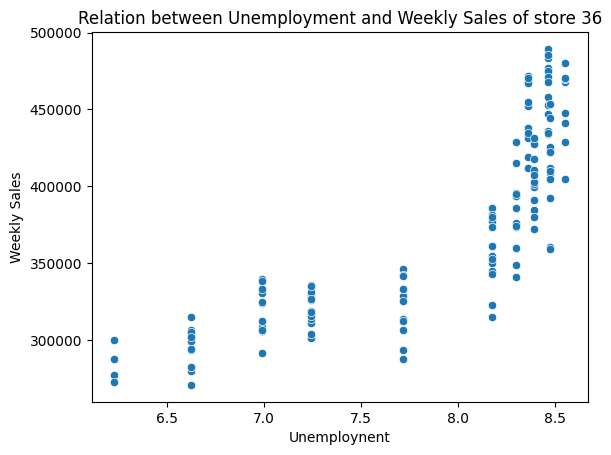

In [48]:
store = df_walmart[df_walmart['Store'] == 36][['Unemployment', 'Weekly_Sales']]
store.shape

sns.scatterplot(data=store, x='Unemployment', y='Weekly_Sales')
plt.title("Relation between Unemployment and Weekly Sales of store 36")
plt.xlabel("Unemploynent")
plt.ylabel("Weekly Sales")
plt.show()

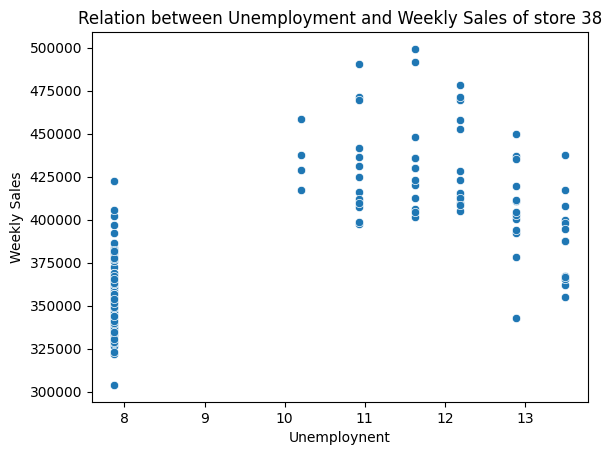

In [49]:
store = df_walmart[df_walmart['Store'] == 38][['Unemployment', 'Weekly_Sales']]
store.shape

sns.scatterplot(data=store, x='Unemployment', y='Weekly_Sales')
plt.title("Relation between Unemployment and Weekly Sales of store 38")
plt.xlabel("Unemploynent")
plt.ylabel("Weekly Sales")
plt.show()

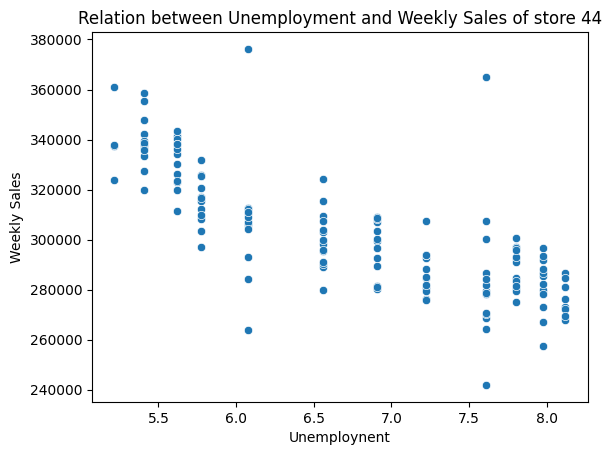

In [50]:
store = df_walmart[df_walmart['Store'] == 44][['Unemployment', 'Weekly_Sales']]
store.shape

sns.scatterplot(data=store, x='Unemployment', y='Weekly_Sales')
plt.title("Relation between Unemployment and Weekly Sales of store 44")
plt.xlabel("Unemploynent")
plt.ylabel("Weekly Sales")
plt.show()

> Conclusion:
- Store 36 is facing increase in weekly sales as increased unemployment rate.
- Store 38 is facing increase in weekly sales as increased unemployment rate upto certain level then decrease in weekly sales at higher unemployment rate.
- Store 44 is facing decrease in  weekly sales as increased unemployment rate.

#### b. If the weekly sales show a `seasonal trend`, when and what could be the reason?

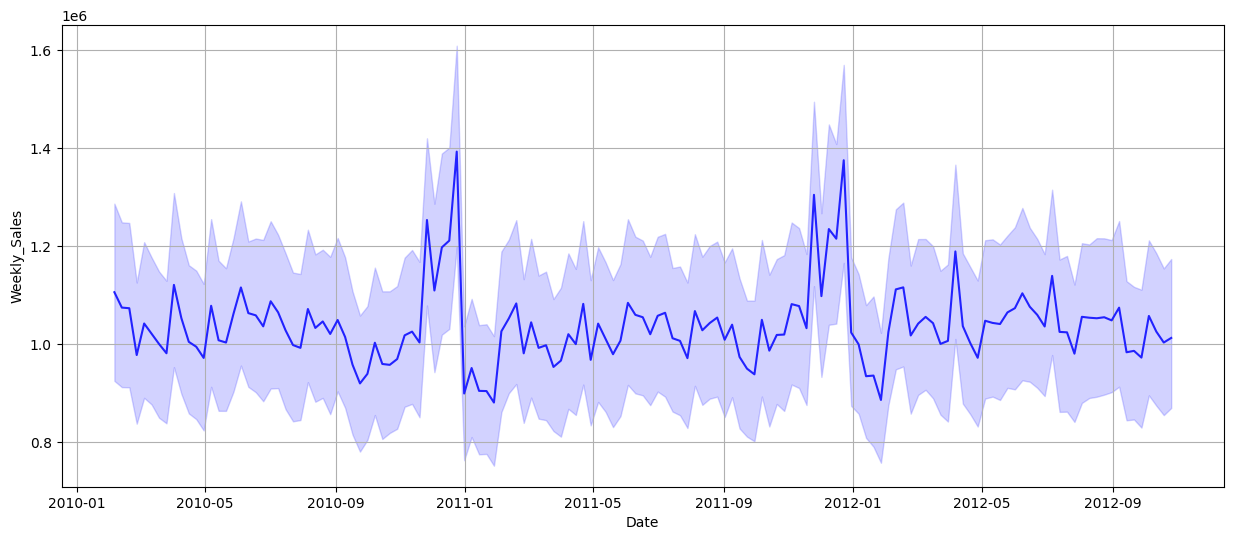

In [51]:
fig = plt.subplots(figsize=(15, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=df_walmart, color='#2222FF')
plt.grid(True)
plt.show()

C:\Users\Kunal\AppData\Local\Temp\ipykernel_15904\4030100200.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_walmart, x='Month', y='Weekly_Sales', hue='Year', ci=None)


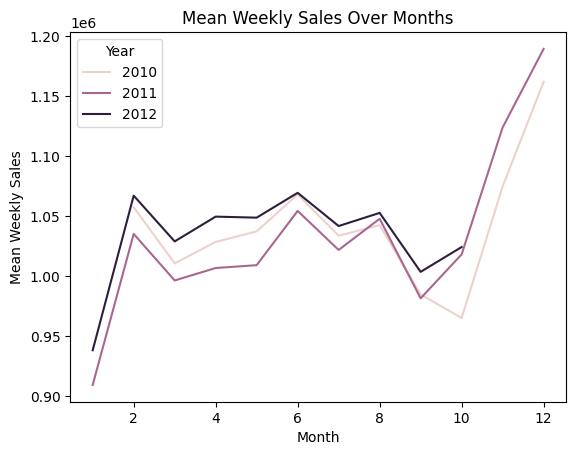

In [52]:
df_walmart['Date']= pd.to_datetime(df_walmart['Date'])
df_walmart['Month']= df_walmart['Date'].dt.month
df_walmart['Year']=df_walmart['Date'].dt.year

sns.lineplot(data=df_walmart, x='Month', y='Weekly_Sales', hue='Year', ci=None)
plt.title('Mean Weekly Sales Over Months')
plt.xlabel('Month')
plt.ylabel('Mean Weekly Sales')
plt.show()

> Conclusion:
- Weekly sales show a seasonality in its dataset near the month of December in both years.
- Reason behind this seasonality can be the Christmas festival.
- `As per Wikipedia`, the economics of Christmas are significant because Christmas is typically a high-volume selling season for goods suppliers around the world. Sales increase dramatically as people purchase gifts, decorations, and supplies to celebrate.

#### c. Does temperature affect the weekly sales in any manner?

In [53]:
def calculate_correlation(group):
    return pd.Series({'correlation': group['Weekly_Sales'].corr(group['Temperature'])})

corr_temp = df_walmart.groupby('Store').apply(calculate_correlation).reset_index()

C:\Users\Kunal\AppData\Local\Temp\ipykernel_15904\1102779453.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_temp = df_walmart.groupby('Store').apply(calculate_correlation).reset_index()


In [54]:
corr_temp.head(3)

Store  correlation
0      1           -0
1      2           -0
2      3           -0

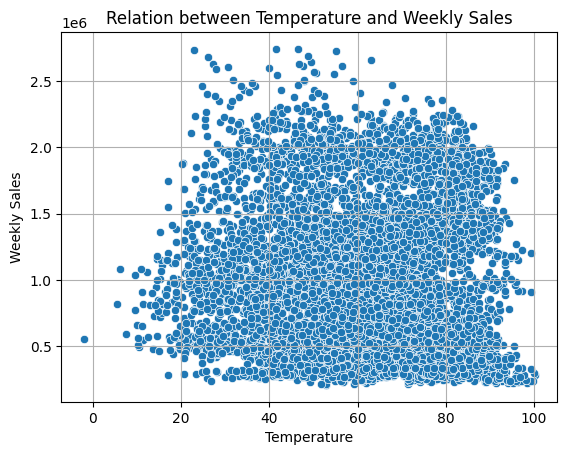

In [55]:
plt.plot()
sns.scatterplot(data=df_walmart, x='Temperature', y='Weekly_Sales')
plt.title("Relation between Temperature and Weekly Sales")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()

In [56]:
temp_impact = corr_temp[corr_temp['correlation'].abs() > 0.3]
print("Stores suffering due to Temperature:\n", temp_impact)

Stores suffering due to Temperature:
     Store  correlation
2       3           -0
7       8           -0
11     12           -0
12     13            0
27     28           -0
29     30           -0
36     37           -0


In [57]:
temp_impact = corr_temp[corr_temp['correlation'].abs() > 0.5]
print("Stores suffering due to Temperature:\n", temp_impact.shape)

Stores suffering due to Temperature:
 (0, 2)


> Conclusion:
- If we consider correlation between weekly sales and temperature there is moderate correlation between them and strong positive or strong negative correlation is not observed.
- while weekly sales are higher when temperature is between 20 and 80.
- Below temperature of 20 weekly sales are dropping significantly.

#### d. How is the Consumer Price index affecting the weekly sales of various stores?

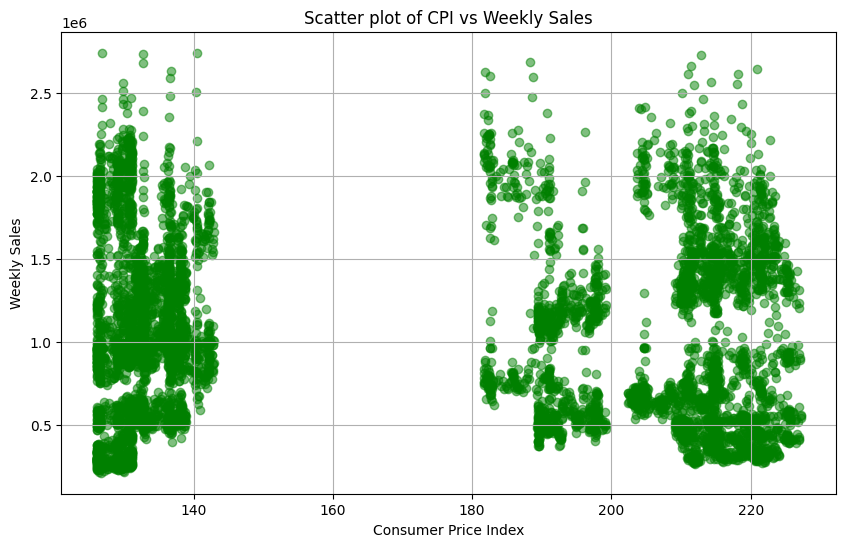

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(df_walmart['CPI'], df_walmart['Weekly_Sales'], alpha=0.5, c='g')
plt.title('Scatter plot of CPI vs Weekly Sales')
plt.xlabel('Consumer Price Index')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

> Conclusion:
- In above graph we can see three different clusters of weekly sales with specific Consumer Price Index.
- But no correlation is observed between Consumer Price Index and Weekly Sales.


#### e. Top performing stores according to the historical data.

In [59]:
top_stores = df_walmart.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

In [60]:
print("Top performing stores:", top_stores.head())

Top performing stores: Store
4    288579012
20   286748957
14   279970569
13   273966947
2    270643556
Name: Weekly_Sales, dtype: float64


#### f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [61]:
worst_stores = df_walmart.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=True)
worst_stores.head()

Store
33   37160222
44   43293088
5    45475689
36   53412215
38   55159626
Name: Weekly_Sales, dtype: float64

In [62]:
diff_stores = df_walmart.groupby('Store')['Weekly_Sales'].sum().max() - df_walmart.groupby('Store')['Weekly_Sales'].sum().min()
diff_stores

251418790.29999998

In [63]:
print("Worst performing store:", worst_stores.head())
print("\nDifference between highest and lowest performing stores:", diff_stores)

Worst performing store: Store
33   37160222
44   43293088
5    45475689
36   53412215
38   55159626
Name: Weekly_Sales, dtype: float64

Difference between highest and lowest performing stores: 251418790.29999998


=============================================================================================================

## 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

=============================================================================================================

In [64]:
worst_stores.head(5)

Store
33   37160222
44   43293088
5    45475689
36   53412215
38   55159626
Name: Weekly_Sales, dtype: float64

In [65]:
best_performing_stores = df_walmart.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
best_performing_stores.head(5)

Store
4    288579012
20   286748957
14   279970569
13   273966947
2    270643556
Name: Weekly_Sales, dtype: float64

In [66]:
df_walmart.head(3)

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  CPI  \
0      1 2010-02-05       1643691             0           42           3  211   
1      1 2010-02-12       1641957             1           39           3  211   
2      1 2010-02-19       1611968             0           40           3  211   

   Unemployment  Month  Year  
0             8      2  2010  
1             8      2  2010  
2             8      2  2010

In [67]:
# Top 5 Performing Stores
store_4 = df_walmart[df_walmart['Store'] == 4]
store_20 = df_walmart[df_walmart['Store'] == 20]
store_14 = df_walmart[df_walmart['Store'] == 14]
store_13 = df_walmart[df_walmart['Store'] == 13]
store_2 = df_walmart[df_walmart['Store'] == 2]

# Bottom 5 Performing Stores
store_33 = df_walmart[df_walmart['Store'] == 33]
store_44 = df_walmart[df_walmart['Store'] == 44]
store_5 = df_walmart[df_walmart['Store'] == 5]
store_36 = df_walmart[df_walmart['Store'] == 36]
store_38 = df_walmart[df_walmart['Store'] == 38]

=============================================================================================================

## 12 Weeks Forecast of Top 5 Stores

### **`Forecast for Store 4`**

C:\Users\Kunal\AppData\Local\Temp\ipykernel_15904\2450718877.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_4['Date'] = pd.to_datetime(store_4['Date'])


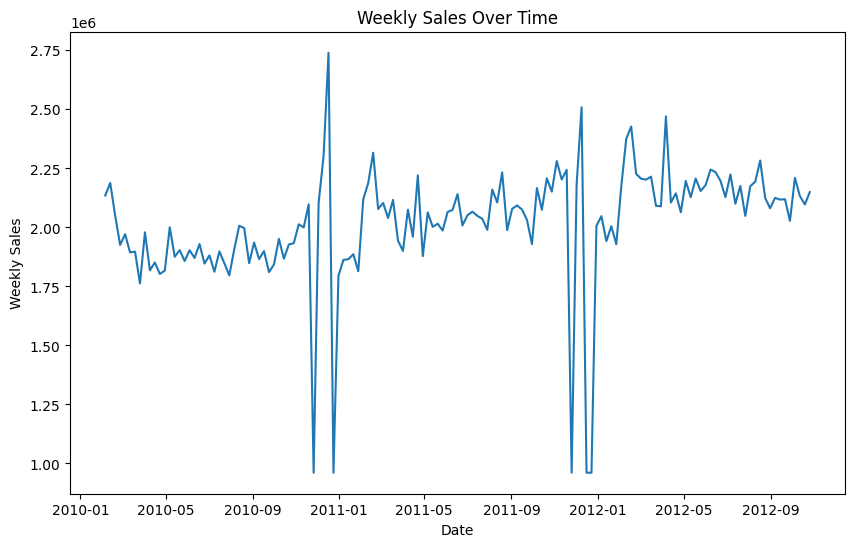

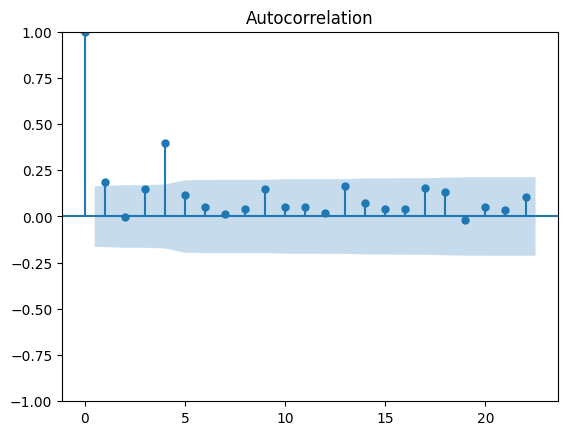

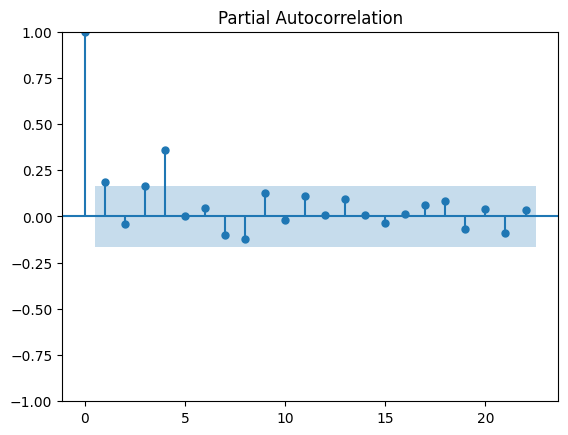

C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1974.820
Date:                Wed, 09 Oct 2024   AIC                           3955.640
Time:                        14:38:33   BIC                           3964.508
Sample:                    02-05-2010   HQIC                          3959.244
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1635      0.044      3.754      0.000       0.078       0.249
ma.L1         -0.9389      0.032    -29.211      0.000      -1.002      -0.876
sigma2      5.947e+10   4.63e-13   1.28e+23      0.0

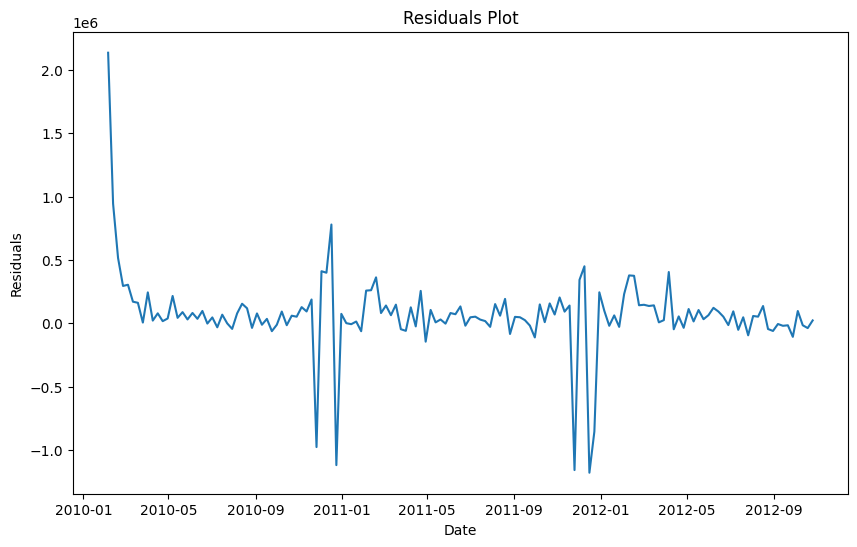

Forecasted values: 
 2012-11-02   2137037
2012-11-09   2134985
2012-11-16   2134649
2012-11-23   2134594
2012-11-30   2134585
2012-12-07   2134584
2012-12-14   2134583
2012-12-21   2134583
2012-12-28   2134583
2013-01-04   2134583
2013-01-11   2134583
2013-01-18   2134583
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [68]:
# Store 4

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Converting 'Date' column in datetime format and set as index
store_4['Date'] = pd.to_datetime(store_4['Date'])
store_4.set_index('Date', inplace=True)

#Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(store_4['Weekly_Sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

#Checking autocorrelation and partial autocorrelation plots
plot_acf(store_4['Weekly_Sales'])
plot_pacf(store_4['Weekly_Sales'])
plt.show()

#Fit ARIMA model
model = ARIMA(store_4['Weekly_Sales'], order=(1, 1, 1))  
results = model.fit()


print(results.summary())

#Plotting the residuals
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

#Making forecasts
forecast = results.forecast(steps=12)
print("Forecasted values: \n", forecast)

=============================================================================================================

### **`Forecast for Store 20`**

C:\Users\Kunal\AppData\Local\Temp\ipykernel_15904\4108778374.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_20['Date'] = pd.to_datetime(store_20['Date'])


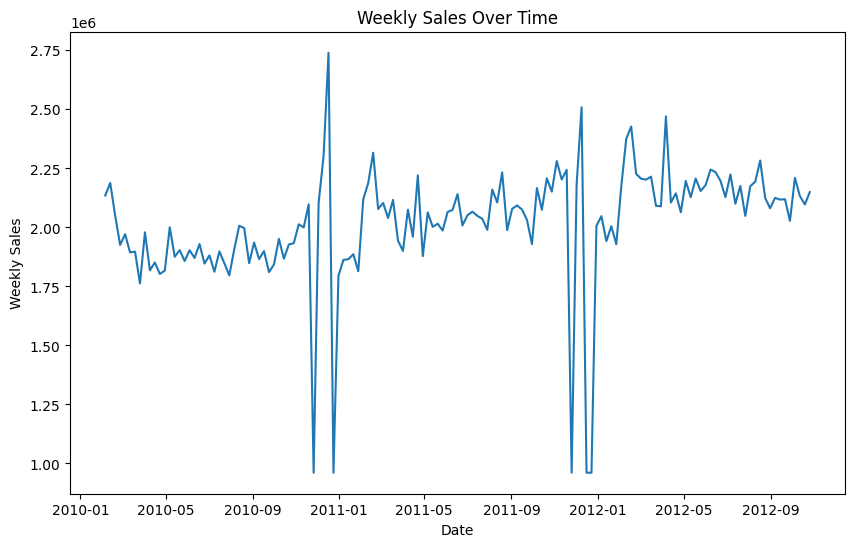

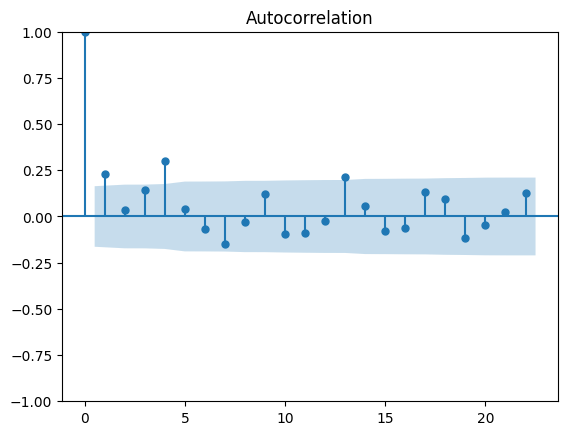

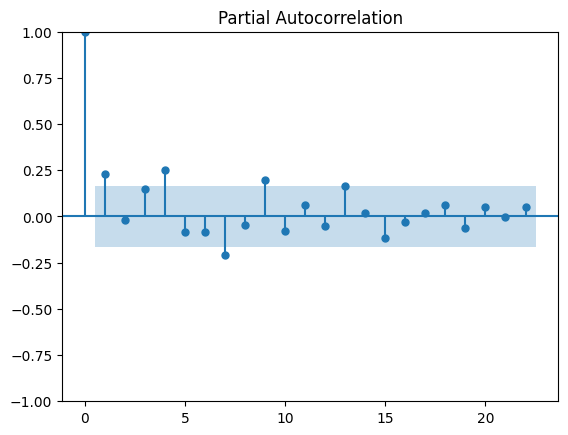

C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1985.686
Date:                Wed, 09 Oct 2024   AIC                           3977.373
Time:                        14:38:34   BIC                           3986.240
Sample:                    02-05-2010   HQIC                          3980.976
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2744      0.043      6.352      0.000       0.190       0.359
ma.L1         -0.9734      0.029    -33.867      0.000      -1.030      -0.917
sigma2      7.637e+10   1.22e-13   6.24e+23      0.0

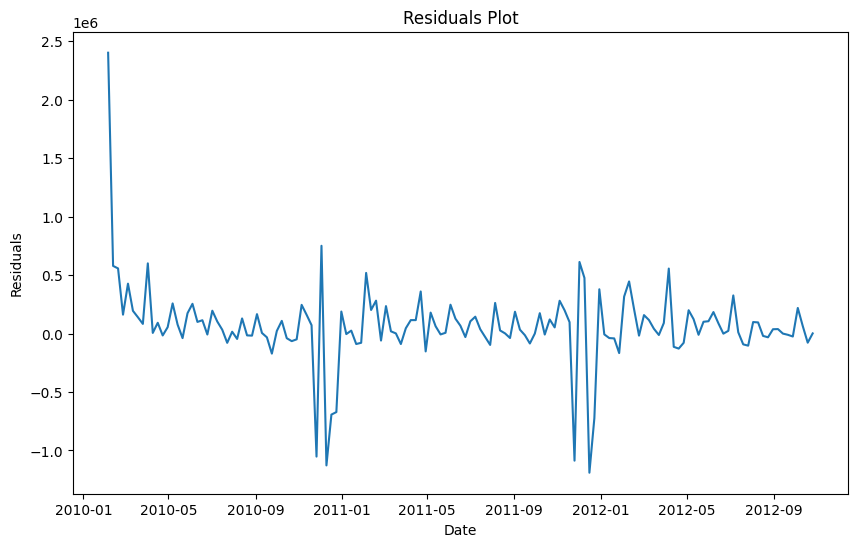

Forecasted values:
 2012-11-02   2039693
2012-11-09   2041900
2012-11-16   2042505
2012-11-23   2042671
2012-11-30   2042717
2012-12-07   2042729
2012-12-14   2042733
2012-12-21   2042734
2012-12-28   2042734
2013-01-04   2042734
2013-01-11   2042734
2013-01-18   2042734
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [69]:
# Store 20

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Converting 'Date' column in datetime format and set as index
store_20['Date'] = pd.to_datetime(store_20['Date'])
store_20.set_index('Date', inplace=True)

#Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(store_4['Weekly_Sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

#Checking autocorrelation and partial autocorrelation plots
plot_acf(store_20['Weekly_Sales'])
plot_pacf(store_20['Weekly_Sales'])
plt.show()

#Fit ARIMA model
model = ARIMA(store_20['Weekly_Sales'], order=(1, 1, 1))  
results = model.fit()


print(results.summary())

#Plotting the residuals
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

#Making forecasts
forecast = results.forecast(steps=12)
print("Forecasted values:\n", forecast)

=============================================================================================================

### **`Forecast for Store 14`**

C:\Users\Kunal\AppData\Local\Temp\ipykernel_15904\2971594999.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_14['Date'] = pd.to_datetime(store_14['Date'])


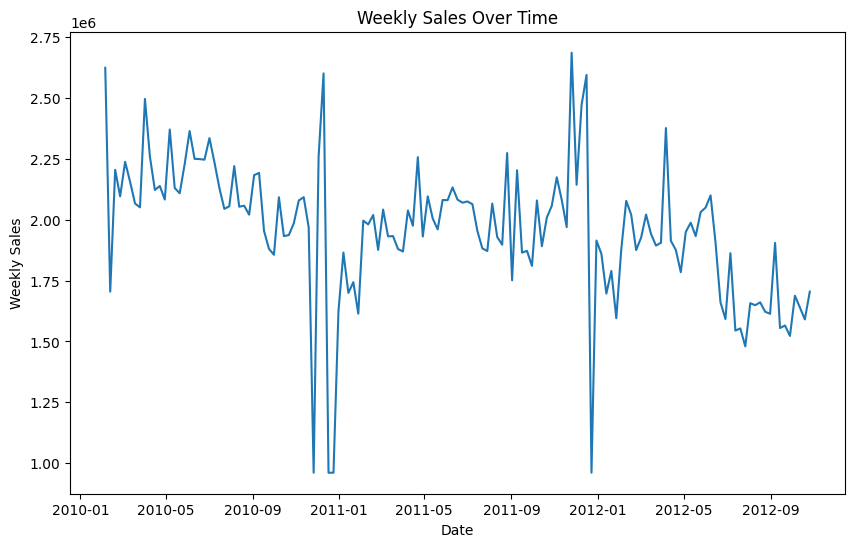

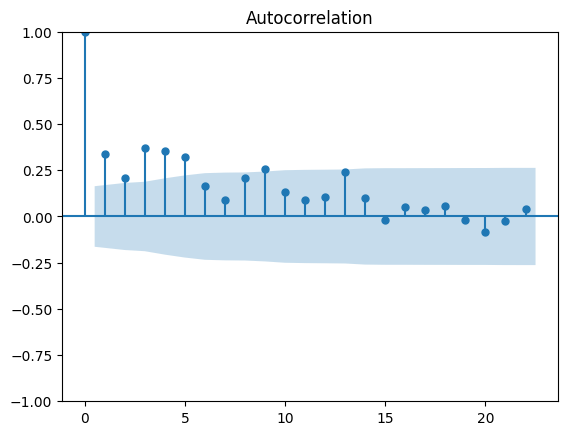

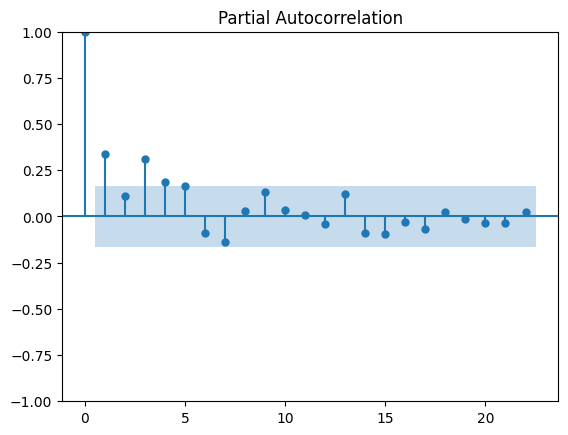

C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1974.263
Date:                Wed, 09 Oct 2024   AIC                           3954.527
Time:                        14:38:35   BIC                           3963.394
Sample:                    02-05-2010   HQIC                          3958.130
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0523      0.069      0.756      0.449      -0.083       0.188
ma.L1         -0.7522      0.061    -12.349      0.000      -0.872      -0.633
sigma2      6.891e+10   5.76e-13    1.2e+23      0.0

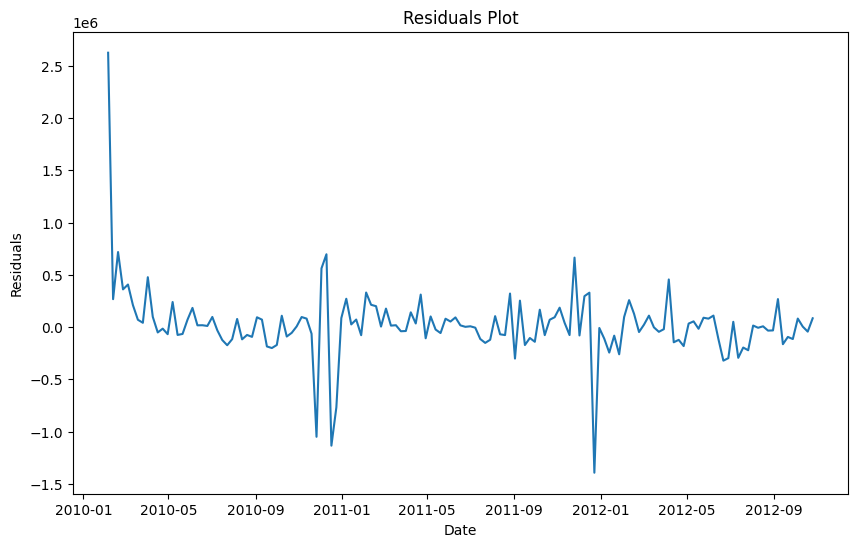

Forecasted values:
 2012-11-02   1647107
2012-11-09   1644110
2012-11-16   1643953
2012-11-23   1643945
2012-11-30   1643944
2012-12-07   1643944
2012-12-14   1643944
2012-12-21   1643944
2012-12-28   1643944
2013-01-04   1643944
2013-01-11   1643944
2013-01-18   1643944
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [70]:
# Store 14

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Converting 'Date' column in datetime format and set as index
store_14['Date'] = pd.to_datetime(store_14['Date'])
store_14.set_index('Date', inplace=True)

#Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(store_14['Weekly_Sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

#Checking autocorrelation and partial autocorrelation plots
plot_acf(store_14['Weekly_Sales'])
plot_pacf(store_14['Weekly_Sales'])
plt.show()

#Fit ARIMA model
model = ARIMA(store_14['Weekly_Sales'], order=(1, 1, 1))  
results = model.fit()


print(results.summary())

#Plotting the residuals
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

#Making forecasts
forecast = results.forecast(steps=12)
print("Forecasted values:\n", forecast)

=============================================================================================================

### **`Forecast for Store 13`**

C:\Users\Kunal\AppData\Local\Temp\ipykernel_15904\110438096.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_13['Date'] = pd.to_datetime(store_13['Date'])


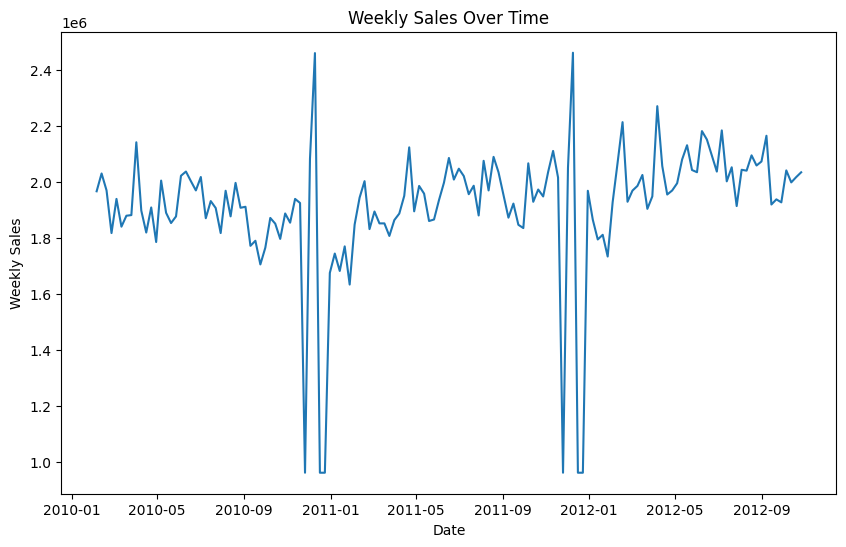

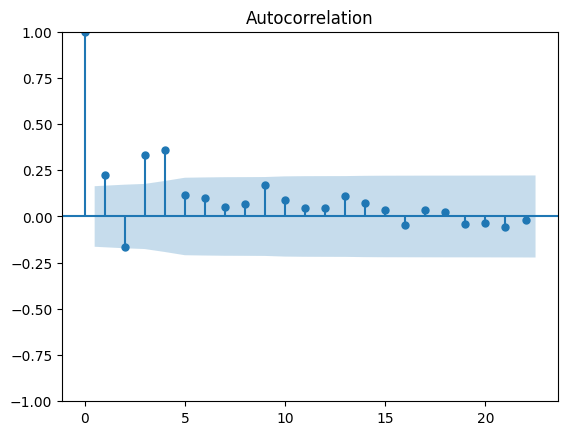

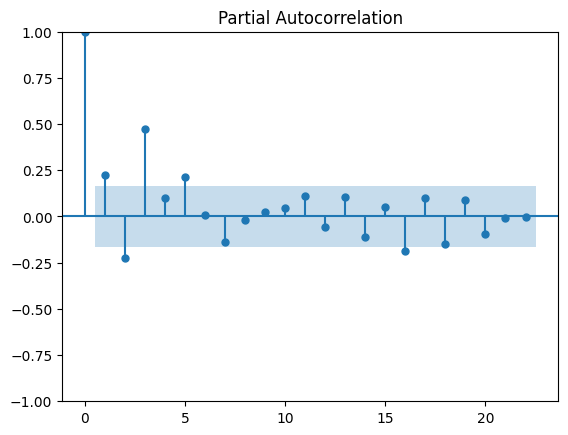

C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1967.159
Date:                Wed, 09 Oct 2024   AIC                           3940.318
Time:                        14:38:36   BIC                           3949.185
Sample:                    02-05-2010   HQIC                          3943.921
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2448      0.068      3.622      0.000       0.112       0.377
ma.L1         -0.9145      0.078    -11.756      0.000      -1.067      -0.762
sigma2      7.494e+10   3.37e-13   2.22e+23      0.0

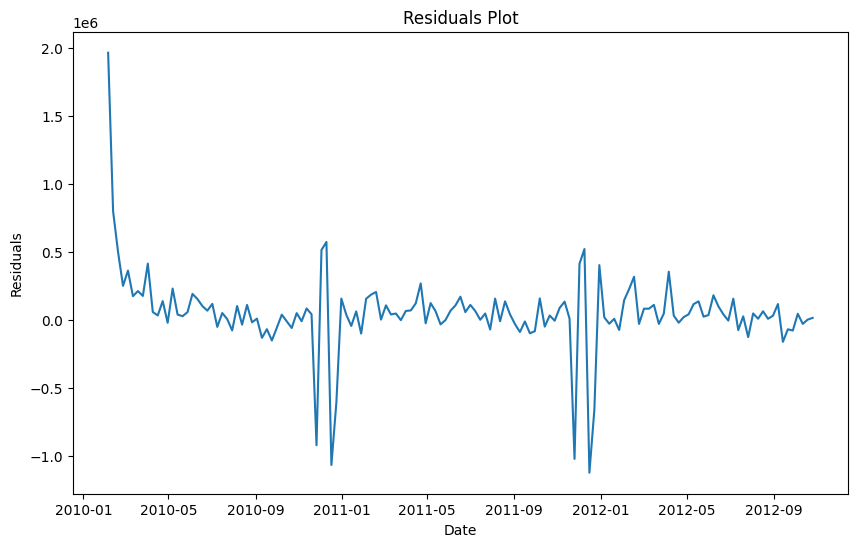

Forecasted values:
 2012-11-02   2026058
2012-11-09   2023823
2012-11-16   2023276
2012-11-23   2023142
2012-11-30   2023109
2012-12-07   2023101
2012-12-14   2023099
2012-12-21   2023099
2012-12-28   2023099
2013-01-04   2023099
2013-01-11   2023099
2013-01-18   2023099
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [71]:
# Store 13

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Converting 'Date' column in datetime format and set as index
store_13['Date'] = pd.to_datetime(store_13['Date'])
store_13.set_index('Date', inplace=True)

#Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(store_13['Weekly_Sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

#Checking autocorrelation and partial autocorrelation plots
plot_acf(store_13['Weekly_Sales'])
plot_pacf(store_13['Weekly_Sales'])
plt.show()

#Fit ARIMA model
model = ARIMA(store_13['Weekly_Sales'], order=(1, 1, 1))  
results = model.fit()


print(results.summary())

#Plotting the residuals
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

#Making forecasts
forecast = results.forecast(steps=12)
print("Forecasted values:\n", forecast)

=============================================================================================================

### **`Forecast for Store 2`**

C:\Users\Kunal\AppData\Local\Temp\ipykernel_15904\3307175932.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_2['Date'] = pd.to_datetime(store_2['Date'])


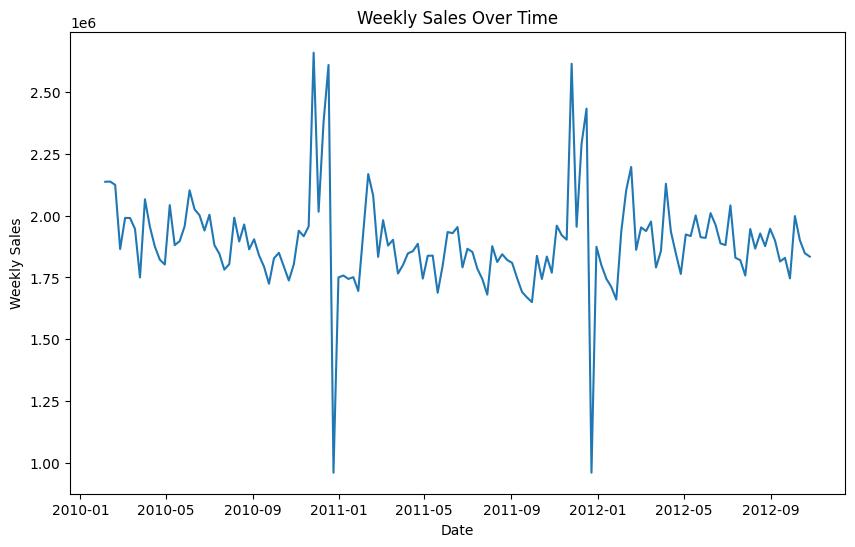

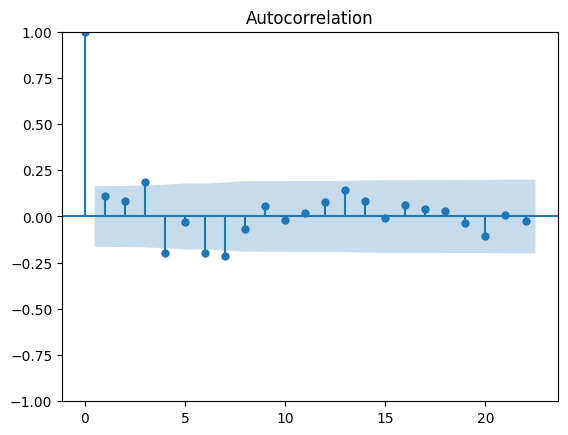

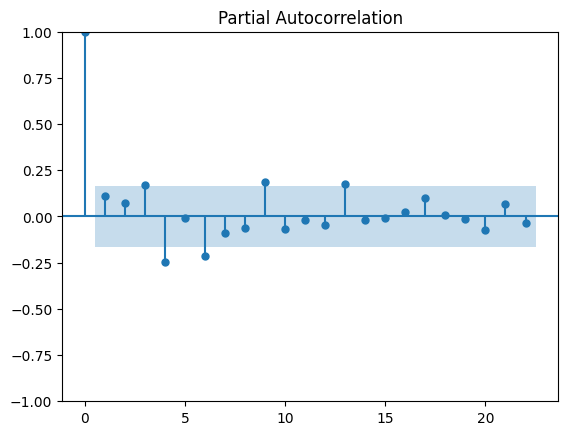

C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1949.132
Date:                Wed, 09 Oct 2024   AIC                           3904.263
Time:                        14:38:37   BIC                           3913.131
Sample:                    02-05-2010   HQIC                          3907.867
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2320      0.051      4.529      0.000       0.132       0.332
ma.L1         -0.9976      0.058    -17.073      0.000      -1.112      -0.883
sigma2      5.156e+10   1.13e-12   4.57e+22      0.0

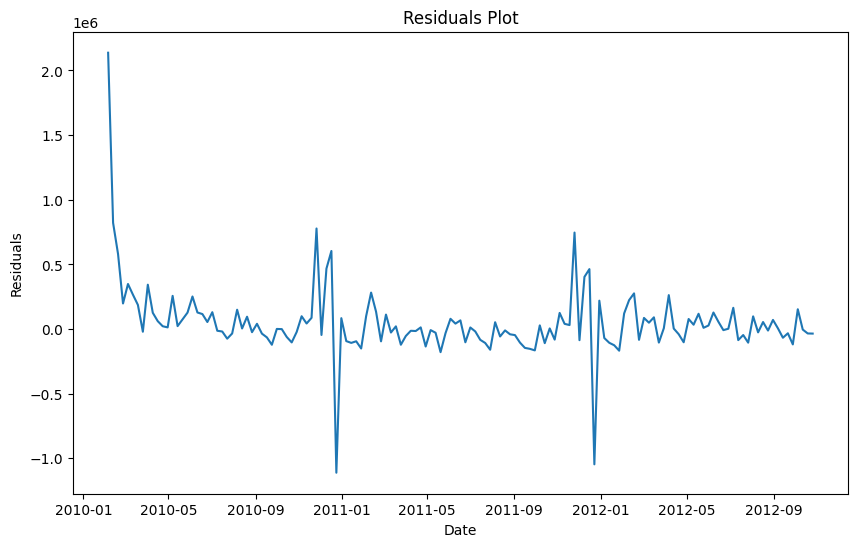

Forecasted values:
 2012-11-02   1866074
2012-11-09   1873410
2012-11-16   1875112
2012-11-23   1875507
2012-11-30   1875598
2012-12-07   1875620
2012-12-14   1875625
2012-12-21   1875626
2012-12-28   1875626
2013-01-04   1875626
2013-01-11   1875626
2013-01-18   1875626
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [72]:
# Store 2

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Converting 'Date' column in datetime format and set as index
store_2['Date'] = pd.to_datetime(store_2['Date'])
store_2.set_index('Date', inplace=True)

#Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(store_2['Weekly_Sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

#Checking autocorrelation and partial autocorrelation plots
plot_acf(store_2['Weekly_Sales'])
plot_pacf(store_2['Weekly_Sales'])
plt.show()

#Fit ARIMA model
model = ARIMA(store_2['Weekly_Sales'], order=(1, 1, 1))  
results = model.fit()


print(results.summary())

#Plotting the residuals
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

#Making forecasts
forecast = results.forecast(steps=12)
print("Forecasted values:\n", forecast)

=============================================================================================================

## 12 Weeks Forecast of Bottom 5 Stores

### **`Forecast for Store 33`**

C:\Users\Kunal\AppData\Local\Temp\ipykernel_15904\2399512461.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_33['Date'] = pd.to_datetime(store_33['Date'])


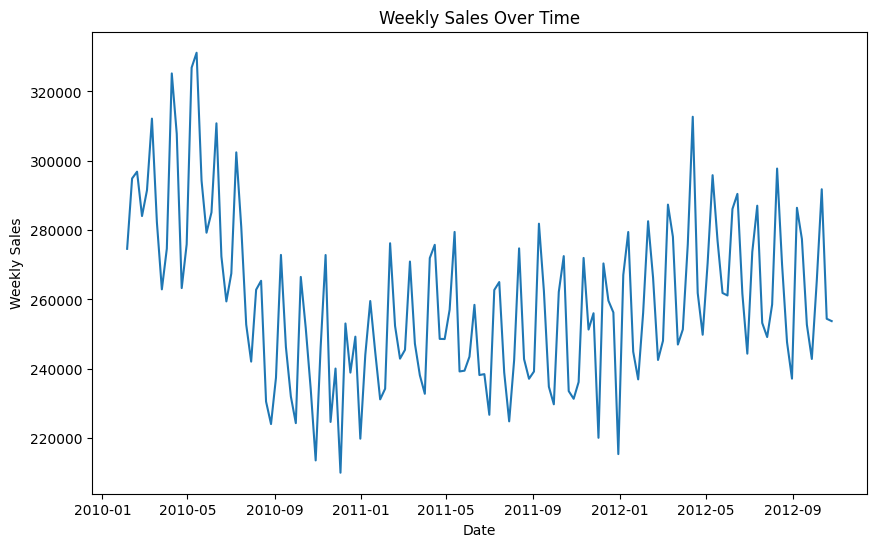

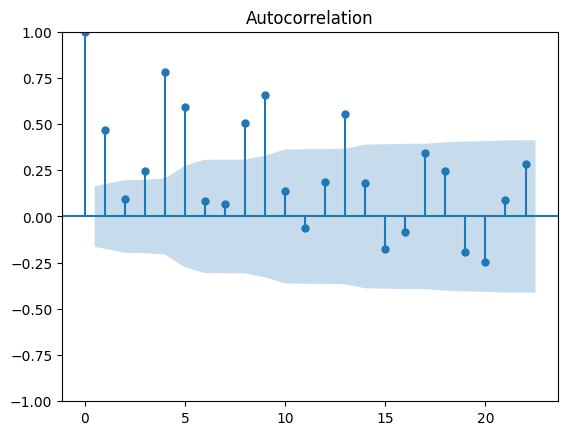

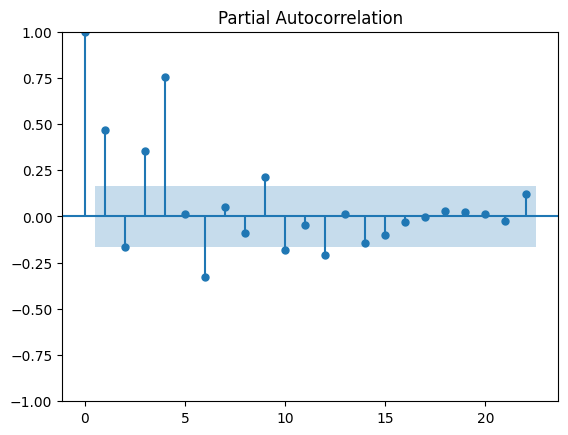

C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1630.911
Date:                Wed, 09 Oct 2024   AIC                           3267.821
Time:                        14:38:38   BIC                           3276.689
Sample:                    02-05-2010   HQIC                          3271.425
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6603      0.050     13.116      0.000       0.562       0.759
ma.L1         -0.9975      0.126     -7.909      0.000      -1.245      -0.750
sigma2      5.425e+08   1.63e-10   3.33e+18      0.0

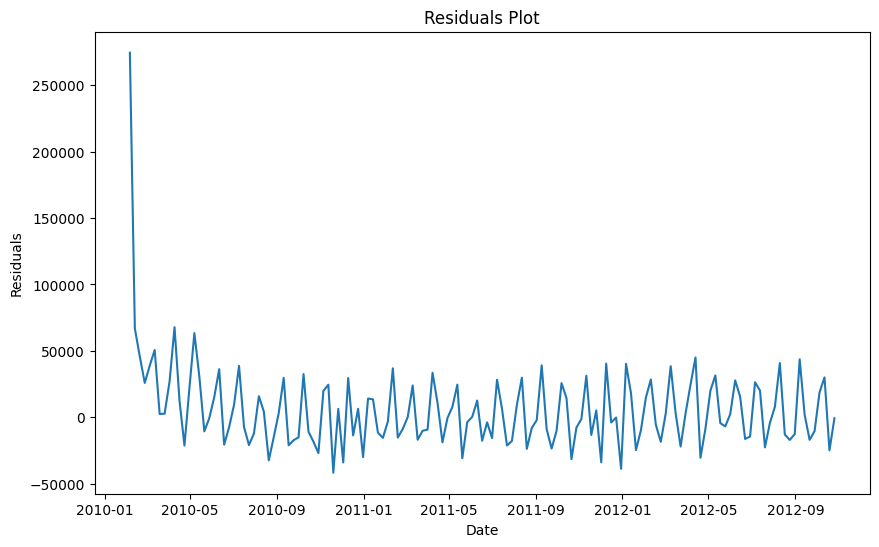

Forecasted values:
 2012-11-02   254072
2012-11-09   254297
2012-11-16   254446
2012-11-23   254544
2012-11-30   254609
2012-12-07   254651
2012-12-14   254680
2012-12-21   254698
2012-12-28   254711
2013-01-04   254719
2013-01-11   254724
2013-01-18   254728
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [73]:
# Store 33

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Converting 'Date' column in datetime format and set as index
store_33['Date'] = pd.to_datetime(store_33['Date'])
store_33.set_index('Date', inplace=True)

#Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(store_33['Weekly_Sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

#Checking autocorrelation and partial autocorrelation plots
plot_acf(store_33['Weekly_Sales'])
plot_pacf(store_33['Weekly_Sales'])
plt.show()

#Fit ARIMA model
model = ARIMA(store_33['Weekly_Sales'], order=(1, 1, 1))  
results = model.fit()


print(results.summary())

#Plotting the residuals
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

#Making forecasts
forecast = results.forecast(steps=12)
print("Forecasted values:\n", forecast)

=============================================================================================================

### **`Forecast for Store 44`**

C:\Users\Kunal\AppData\Local\Temp\ipykernel_15904\3070632509.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_44['Date'] = pd.to_datetime(store_44['Date'])


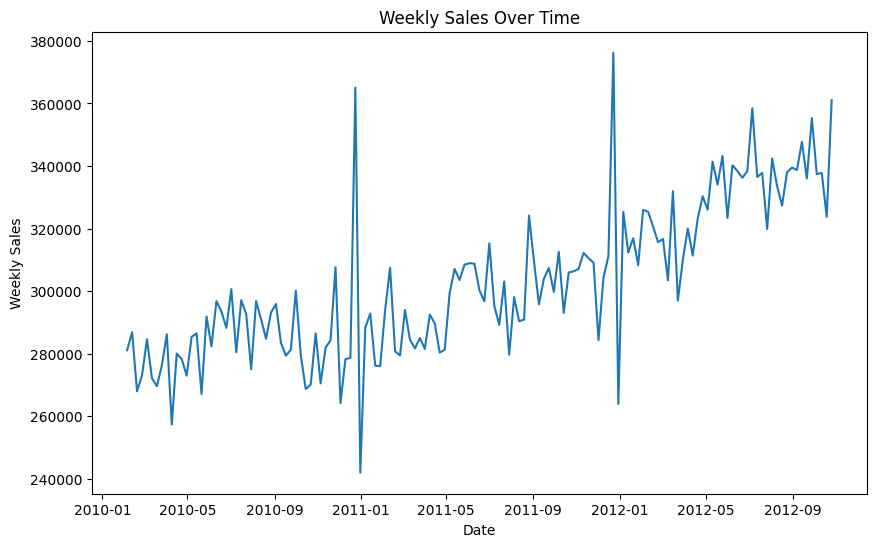

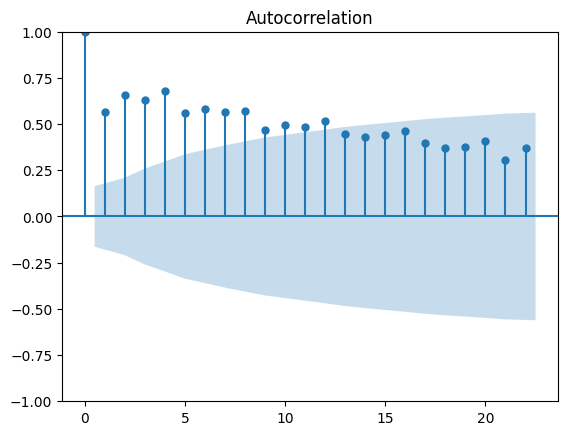

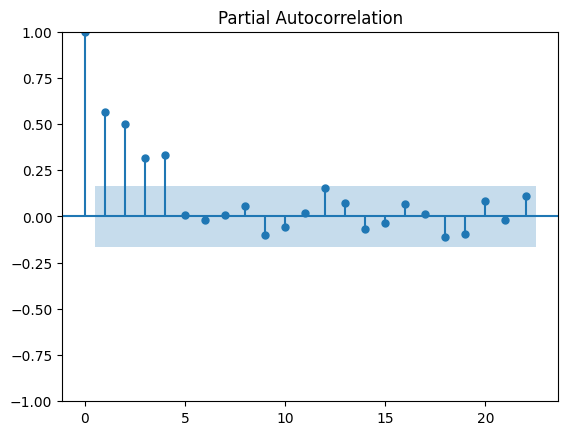

C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1623.597
Date:                Wed, 09 Oct 2024   AIC                           3253.195
Time:                        14:38:39   BIC                           3262.062
Sample:                    02-05-2010   HQIC                          3256.798
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0840      0.047      1.790      0.073      -0.008       0.176
ma.L1         -0.4949      0.057     -8.751      0.000      -0.606      -0.384
sigma2      2.263e+08   4.35e-10    5.2e+17      0.0

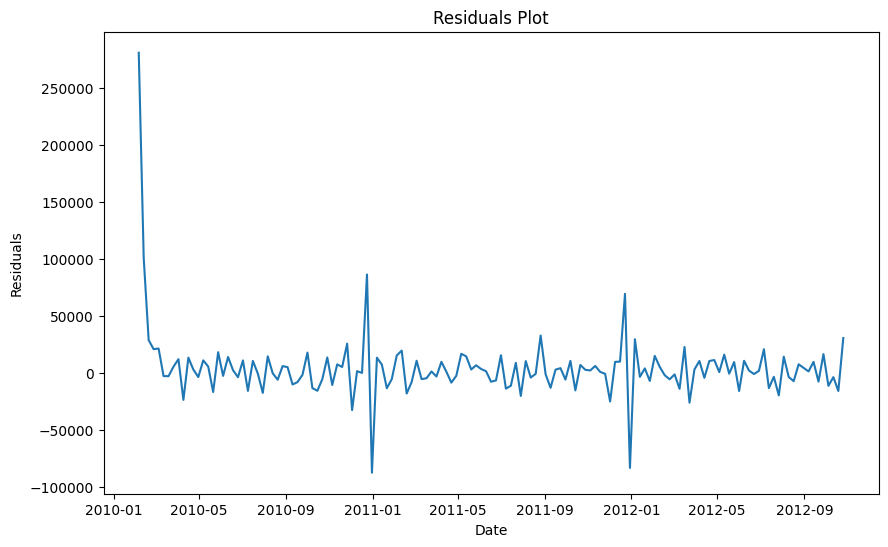

Forecasted values:
 2012-11-02   349051
2012-11-09   348042
2012-11-16   347958
2012-11-23   347950
2012-11-30   347950
2012-12-07   347950
2012-12-14   347950
2012-12-21   347950
2012-12-28   347950
2013-01-04   347950
2013-01-11   347950
2013-01-18   347950
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [74]:
# Store 44

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Converting 'Date' column in datetime format and set as index
store_44['Date'] = pd.to_datetime(store_44['Date'])
store_44.set_index('Date', inplace=True)

#Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(store_44['Weekly_Sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

#Checking autocorrelation and partial autocorrelation plots
plot_acf(store_44['Weekly_Sales'])
plot_pacf(store_44['Weekly_Sales'])
plt.show()

#Fit ARIMA model
model = ARIMA(store_44['Weekly_Sales'], order=(1, 1, 1))  
results = model.fit()


print(results.summary())

#Plotting the residuals
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

#Making forecasts
forecast = results.forecast(steps=12)
print("Forecasted values:\n", forecast)

=============================================================================================================

### **`Forecast for Store 5`**

C:\Users\Kunal\AppData\Local\Temp\ipykernel_15904\1534781247.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_5['Date'] = pd.to_datetime(store_5['Date'])


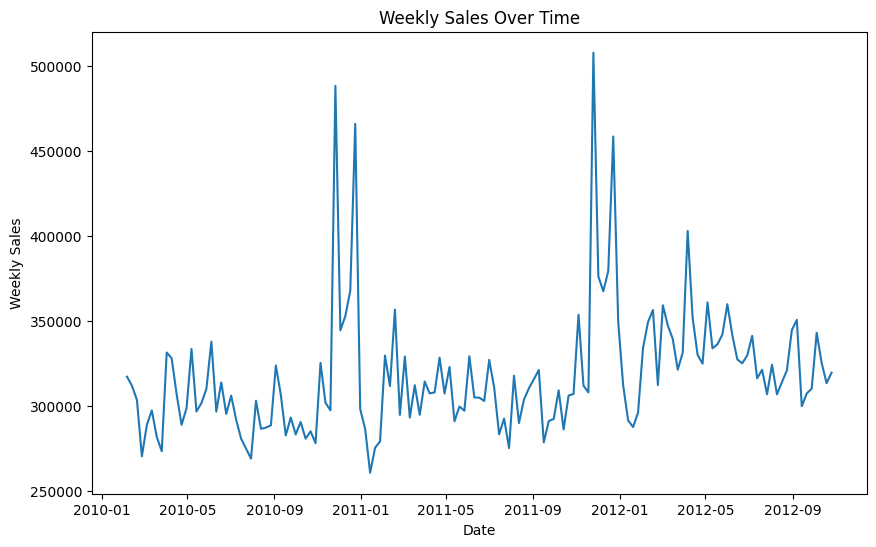

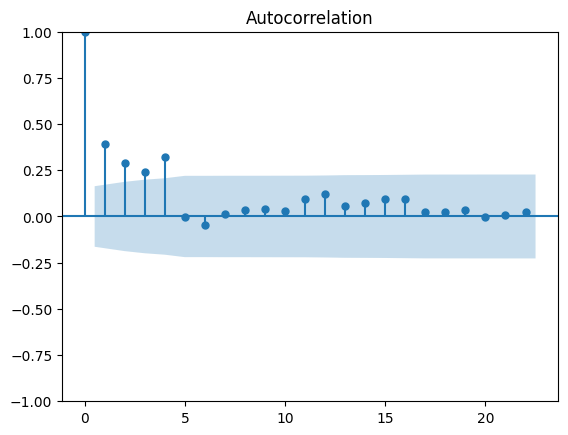

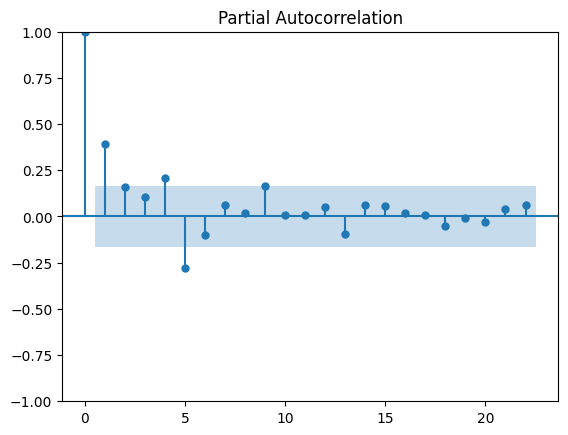

C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1694.925
Date:                Wed, 09 Oct 2024   AIC                           3395.851
Time:                        14:38:39   BIC                           3404.718
Sample:                    02-05-2010   HQIC                          3399.454
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3757      0.072      5.195      0.000       0.234       0.518
ma.L1         -0.8889      0.039    -22.821      0.000      -0.965      -0.813
sigma2       1.24e+09   1.14e-11   1.08e+20      0.0

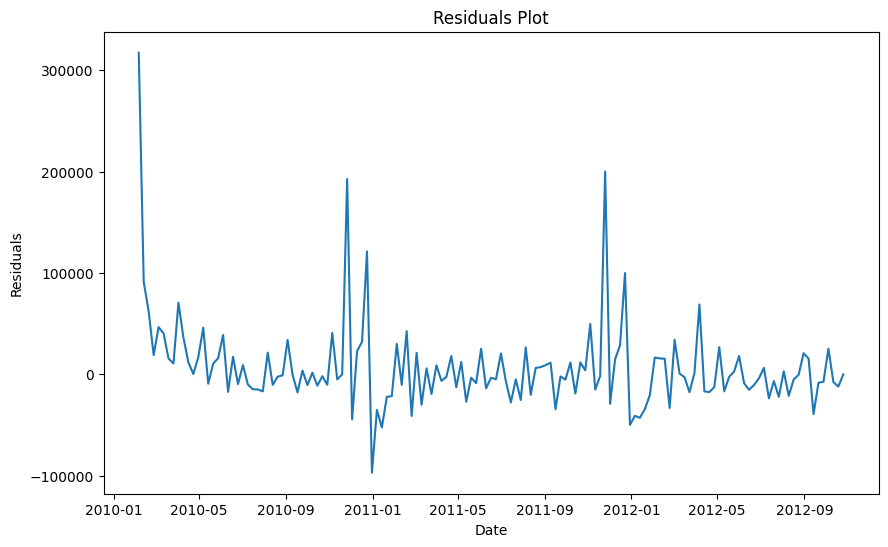

Forecasted values:
 2012-11-02   321882
2012-11-09   322758
2012-11-16   323088
2012-11-23   323211
2012-11-30   323258
2012-12-07   323275
2012-12-14   323282
2012-12-21   323284
2012-12-28   323285
2013-01-04   323285
2013-01-11   323286
2013-01-18   323286
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [75]:
# Store 5

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Converting 'Date' column in datetime format and set as index
store_5['Date'] = pd.to_datetime(store_5['Date'])
store_5.set_index('Date', inplace=True)

#Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(store_5['Weekly_Sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

#Checking autocorrelation and partial autocorrelation plots
plot_acf(store_5['Weekly_Sales'])
plot_pacf(store_5['Weekly_Sales'])
plt.show()

#Fit ARIMA model
model = ARIMA(store_5['Weekly_Sales'], order=(1, 1, 1))  
results = model.fit()


print(results.summary())

#Plotting the residuals
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

#Making forecasts
forecast = results.forecast(steps=12)
print("Forecasted values:\n", forecast)

=============================================================================================================

### **`Forecast for Store 36`**

C:\Users\Kunal\AppData\Local\Temp\ipykernel_15904\2278601957.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_36['Date'] = pd.to_datetime(store_36['Date'])


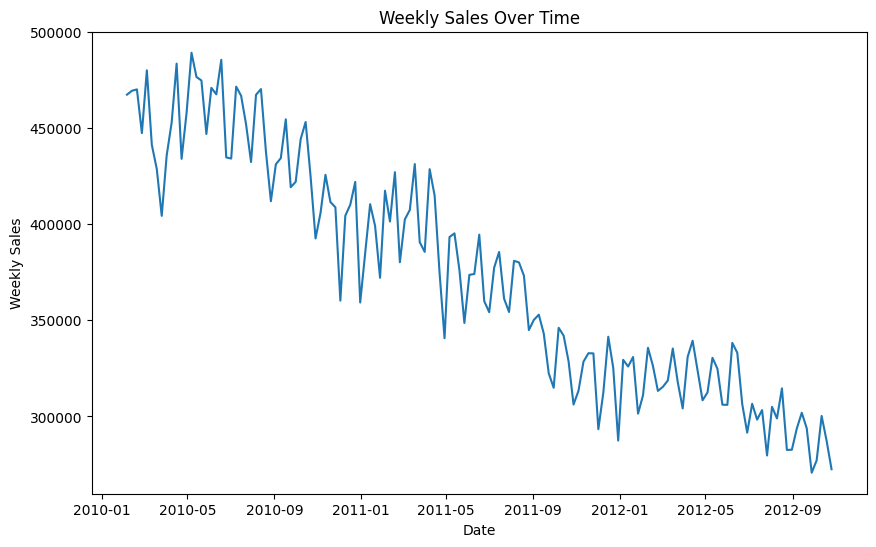

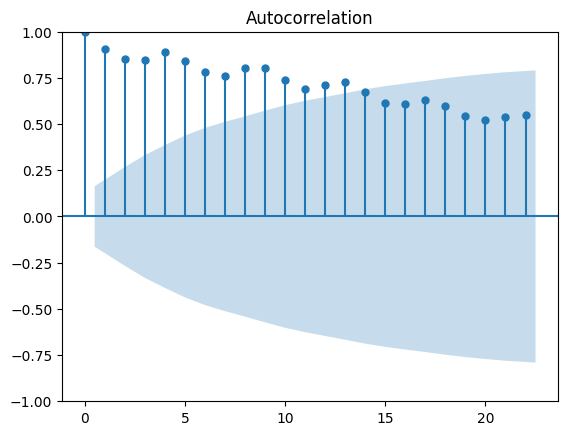

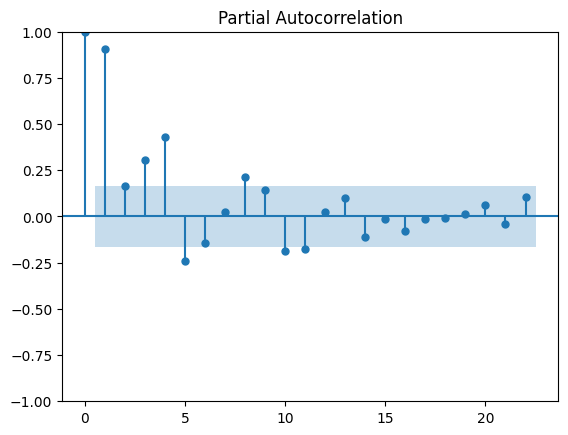

C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1648.068
Date:                Wed, 09 Oct 2024   AIC                           3302.135
Time:                        14:38:40   BIC                           3311.003
Sample:                    02-05-2010   HQIC                          3305.739
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5485      0.081      6.802      0.000       0.390       0.707
ma.L1         -0.6596      0.079     -8.399      0.000      -0.813      -0.506
sigma2      2.581e+08   3.41e-11   7.57e+18      0.0

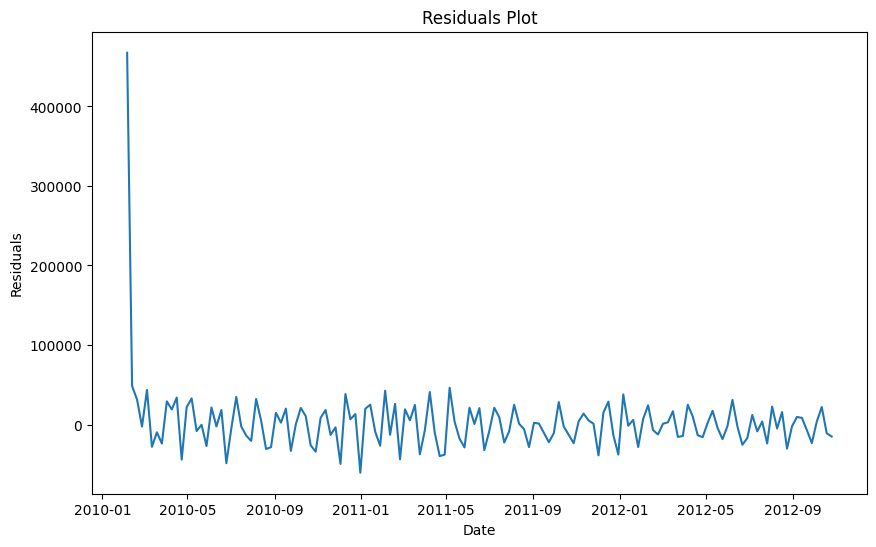

Forecasted values:
 2012-11-02   274275
2012-11-09   275255
2012-11-16   275792
2012-11-23   276087
2012-11-30   276249
2012-12-07   276338
2012-12-14   276386
2012-12-21   276413
2012-12-28   276427
2013-01-04   276436
2013-01-11   276440
2013-01-18   276442
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [76]:
# Store 36

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Converting 'Date' column in datetime format and set as index
store_36['Date'] = pd.to_datetime(store_36['Date'])
store_36.set_index('Date', inplace=True)

#Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(store_36['Weekly_Sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

#Checking autocorrelation and partial autocorrelation plots
plot_acf(store_36['Weekly_Sales'])
plot_pacf(store_36['Weekly_Sales'])
plt.show()

#Fit ARIMA model
model = ARIMA(store_36['Weekly_Sales'], order=(1, 1, 1))
results = model.fit()


print(results.summary())

#Plotting the residuals
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

#Making forecasts
forecast = results.forecast(steps=12)
print("Forecasted values:\n", forecast)

=============================================================================================================

### **`Forecast for Store 38`**

C:\Users\Kunal\AppData\Local\Temp\ipykernel_15904\4065829345.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_38['Date'] = pd.to_datetime(store_38['Date'])


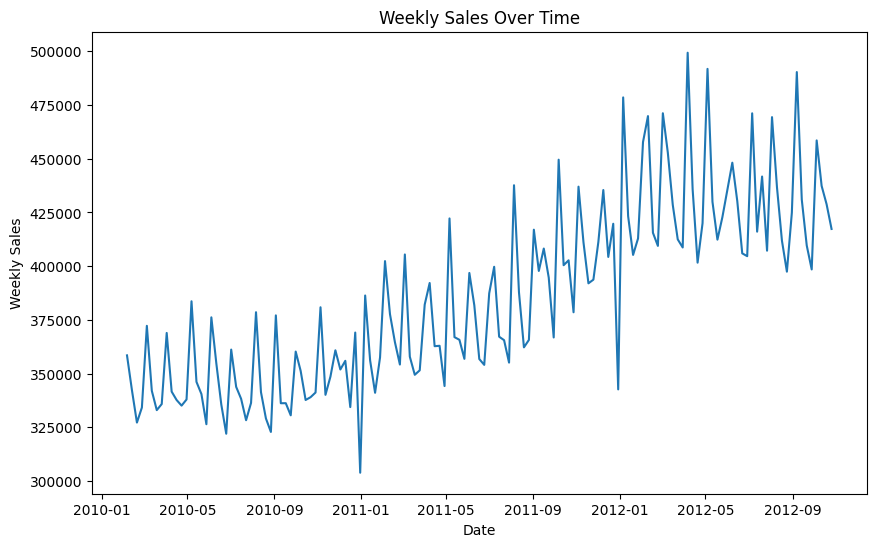

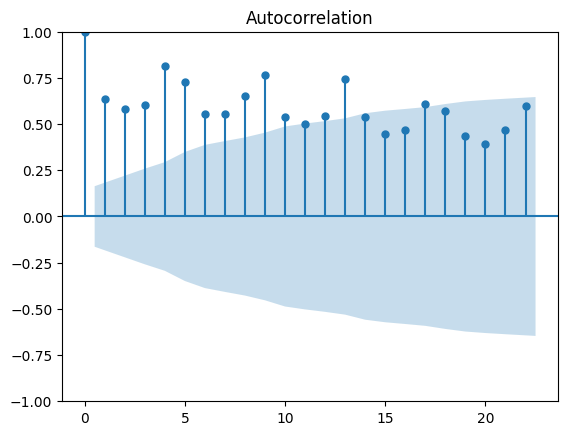

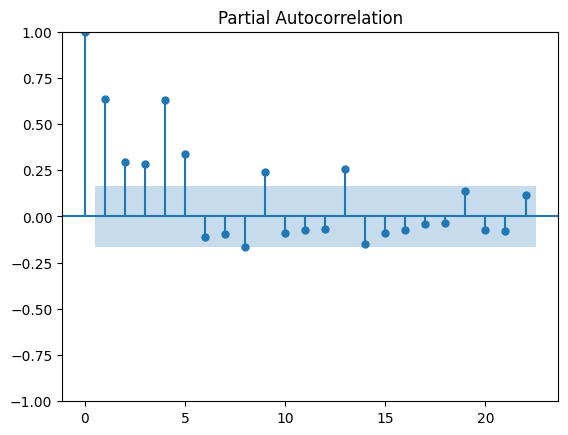

C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1684.174
Date:                Wed, 09 Oct 2024   AIC                           3374.348
Time:                        14:38:42   BIC                           3383.216
Sample:                    02-05-2010   HQIC                          3377.952
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1492      0.028      5.349      0.000       0.095       0.204
ma.L1         -0.7901      0.038    -20.844      0.000      -0.864      -0.716
sigma2      5.375e+08   1.23e-11   4.37e+19      0.0

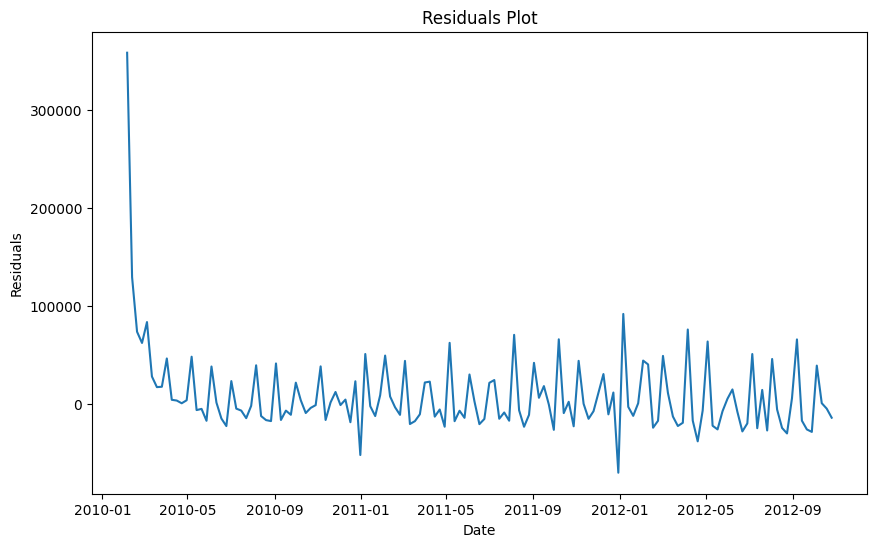

Forecasted values:
 2012-11-02   426577
2012-11-09   427962
2012-11-16   428169
2012-11-23   428199
2012-11-30   428204
2012-12-07   428205
2012-12-14   428205
2012-12-21   428205
2012-12-28   428205
2013-01-04   428205
2013-01-11   428205
2013-01-18   428205
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [77]:
# Store 38

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Converting 'Date' column in datetime format and set as index
store_38['Date'] = pd.to_datetime(store_38['Date'])
store_38.set_index('Date', inplace=True)

#Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(store_38['Weekly_Sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

#Checking autocorrelation and partial autocorrelation plots
plot_acf(store_38['Weekly_Sales'])
plot_pacf(store_38['Weekly_Sales'])
plt.show()

#Fit ARIMA model
model = ARIMA(store_38['Weekly_Sales'], order=(1, 1, 1))  
results = model.fit()


print(results.summary())

#Plotting the residuals
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

#Making forecasts
forecast = results.forecast(steps=12)
print("Forecasted values:\n", forecast)

## Forecast of all stores Combined

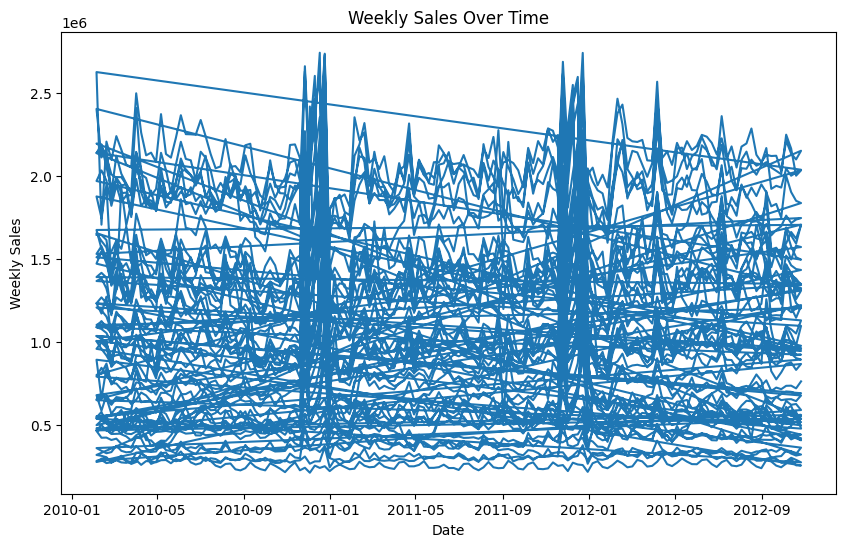

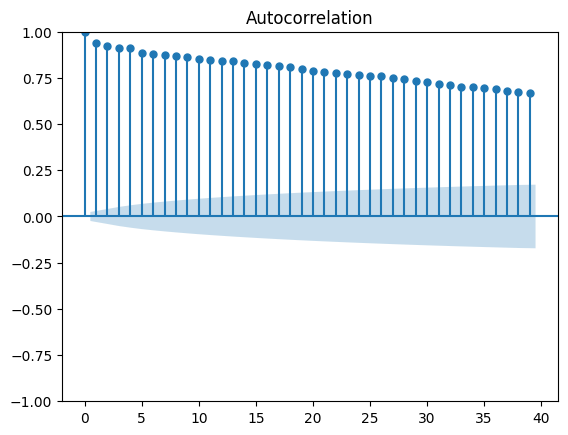

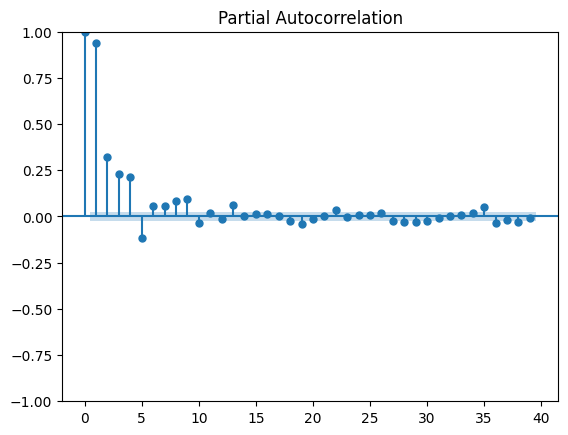

C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                 6435
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -86623.552
Date:                Wed, 09 Oct 2024   AIC                         173253.103
Time:                        14:39:13   BIC                         173273.411
Sample:                             0   HQIC                        173260.131
                               - 6435                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1969      0.012     16.572      0.000       0.174       0.220
ma.L1         -0.6715      0.010    -66.341      0.000      -0.691      -0.652
sigma2      2.831e+10   1.09e-13    2.6e+23      0.0

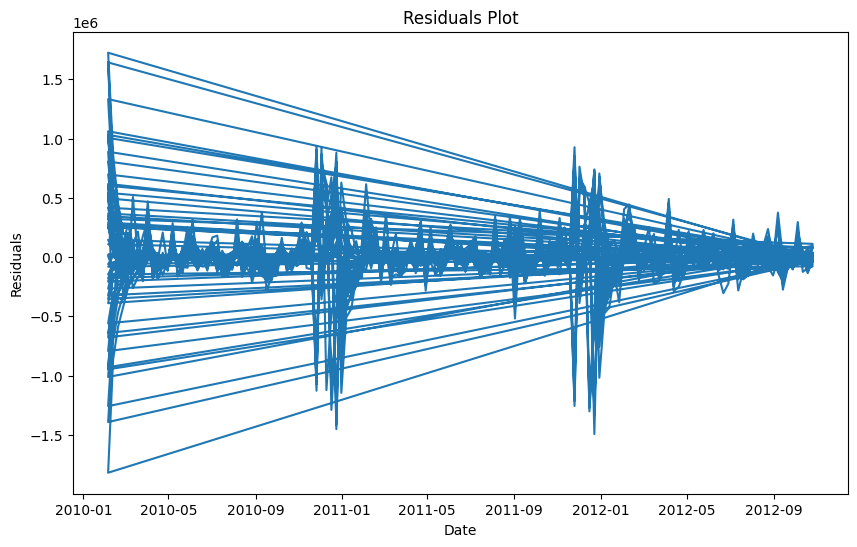

Forecasted values:
 6435   743717
6436   740456
6437   739814
6438   739687
6439   739662
6440   739657
6441   739656
6442   739656
6443   739656
6444   739656
6445   739656
6446   739656
Name: predicted_mean, dtype: float64


C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [78]:
# Overall Forecast

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Converting 'Date' column in datetime format and set as index
df_walmart['Date'] = pd.to_datetime(df_walmart['Date'])
df_walmart.set_index('Date', inplace=True)

#Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df_walmart['Weekly_Sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

#Checking autocorrelation and partial autocorrelation plots
plot_acf(df_walmart['Weekly_Sales'])
plot_pacf(df_walmart['Weekly_Sales'])
plt.show()

#Fit ARIMA model
model = ARIMA(df_walmart['Weekly_Sales'], order=(1, 1, 1))  
results = model.fit()


print(results.summary())

#Plotting the residuals
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

#Making forecasts
forecast = results.forecast(steps=12)
print("Forecasted values:\n", forecast)